## PRI-ME ESTATE PRICE PREDICTION

## Importing and calling all my Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import ceil,floor
from sklearn.feature_selection import SelectKBest,f_classif

import pickle
pd.set_option("display.float_format",'{:2f}'.format)

C:\Users\emmanul\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\emmanul\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


## Loading in the dataset

In [2]:
df = pd.read_csv("Housing_dataset_train.csv")

## Exploring Train_Dataset

In [3]:
df.head(10)

ID      loc                 title  bedroom  bathroom  parking_space  \
0   3583  Katsina  Semi-detached duplex 2.000000  2.000000       1.000000   
1   2748     Ondo             Apartment      NaN  2.000000       4.000000   
2   9261    Ekiti                   NaN 7.000000  5.000000            NaN   
3   2224  Anambra       Detached duplex 5.000000  2.000000       4.000000   
4  10300     Kogi        Terrace duplex      NaN  5.000000       6.000000   
5   1733    Borno               Mansion      NaN  1.000000       3.000000   
6   7892    Kwara              Bungalow      NaN  4.000000       4.000000   
7   3003  Katsina             Penthouse 3.000000  3.000000       5.000000   
8    555     Osun  Semi-detached duplex      NaN  1.000000       2.000000   
9   3085   Kaduna             Penthouse      NaN  3.000000       3.000000   

           price  
0 1149999.565000  
1 1672416.689000  
2 3364799.814000  
3 2410306.756000  
4 2600700.898000  
5 1341750.867000  
6 2125789.778000  
7 2043107.592000  
8 1219453.877000  
9 2710664.872000

## Shape of the Dataset

In [4]:
df.shape

(14000, 7)

## DataType of dataset

In [5]:
df.dtypes

ID                 int64
loc               object
title             object
bedroom          float64
bathroom         float64
parking_space    float64
price            float64
dtype: object

## Checking the missing values in percentages and Duplicates

In [6]:
def check(df):
    df_mv=(df.isnull().sum()/df.shape[0])*100
    print('Missing values:')
    print(df_mv)
    
    df_dv=df.duplicated().sum()
    print("\nDuplicated value:")
    print(df_dv)
    return df

df=check(df)

Missing values:
ID               0.000000
loc             12.950000
title           12.300000
bedroom         12.850000
bathroom        12.892857
parking_space   12.935714
price            0.000000
dtype: float64

Duplicated value:
0



## Checking the unique vales by Data types and the No of unique values

In [7]:
for i in df.columns:
    if df[i].dtypes=='O':
        print(f"\n\n{i} has {df[i].nunique()} categories, and the categories are:\n\n{df[i].unique()}")



loc has 36 categories, and the categories are:

['Katsina' 'Ondo' 'Ekiti' 'Anambra' 'Kogi' 'Borno' 'Kwara' 'Osun' 'Kaduna'
 'Ogun' 'Bayelsa' nan 'Abia' 'Rivers' 'Taraba' 'Ebonyi' 'Kebbi' 'Enugu'
 'Edo' 'Nasarawa' 'Delta' 'Kano' 'Yobe' 'Benue' 'Bauchi' 'Cross River'
 'Niger' 'Adamawa' 'Plateau' 'Imo' 'Oyo' 'Zamfara' 'Sokoto' 'Jigawa'
 'Gombe' 'Akwa Ibom' 'Lagos']


title has 10 categories, and the categories are:

['Semi-detached duplex' 'Apartment' nan 'Detached duplex' 'Terrace duplex'
 'Mansion' 'Bungalow' 'Penthouse' 'Townhouse' 'Flat' 'Cottage']


In [8]:
for i in df.columns:
    if df[i].dtypes=='int64':
        print(f"\n\n{i} has {df[i].nunique()} categories, and the categories are:\n\n{df[i].unique()}")



ID has 10182 categories, and the categories are:

[ 3583  2748  9261 ... 11190  9256  8787]


In [9]:
for i in df.columns:
    if df[i].dtypes=='float':
        print(f"\n\n{i} has {df[i].nunique()} categories, and the categories are:\n\n{df[i].unique()}")



bedroom has 9 categories, and the categories are:

[ 2. nan  7.  5.  3.  1.  4.  6.  9.  8.]


bathroom has 7 categories, and the categories are:

[ 2.  5.  1.  4.  3. nan  7.  6.]


parking_space has 6 categories, and the categories are:

[ 1.  4. nan  6.  3.  5.  2.]


price has 10727 categories, and the categories are:

[1149999.565 1672416.689 3364799.814 ... 1508351.845 2458443.818
 3348918.718]


In [10]:
df.describe()

ID      bedroom     bathroom  parking_space           price
count 14000.000000 12201.000000 12195.000000   12189.000000    14000.000000
mean   4862.700357     4.308171     3.134235       3.169825  2138081.748741
std    3818.348214     2.441165     2.035950       1.599415  1083056.664885
min       0.000000     1.000000     1.000000       1.000000   431967.290000
25%    1672.750000     2.000000     1.000000       2.000000  1393989.517500
50%    3527.000000     4.000000     2.000000       3.000000  1895223.070500
75%    8011.250000     6.000000     5.000000       4.000000  2586699.494000
max   12999.000000     9.000000     7.000000       6.000000 16568486.160000

## Action $1 DATA PREPROCESSING
## Splitting the dataset

In [11]:
train,test = train_test_split(df, test_size=0.2,random_state=123)

In [12]:
train.duplicated().sum()

0

In [13]:
## ACtiom 1 Resetting index
train.reset_index(drop=True, inplace=True)
train.head(10)

ID          loc                 title  bedroom  bathroom  parking_space  \
0   1071       Kaduna               Mansion 5.000000       NaN            NaN   
1   5387    Akwa Ibom                   NaN 3.000000  1.000000       3.000000   
2   8100        Benue  Semi-detached duplex 5.000000       NaN       1.000000   
3  11439        Ekiti               Mansion 4.000000  7.000000       1.000000   
4    531     Nasarawa                  Flat 1.000000  2.000000            NaN   
5   2134        Gombe                   NaN 1.000000  1.000000       5.000000   
6    447  Cross River             Penthouse      NaN       NaN       1.000000   
7   8816          Edo             Penthouse 8.000000  6.000000       6.000000   
8  11655        Delta  Semi-detached duplex 9.000000  5.000000            NaN   
9    950          NaN  Semi-detached duplex 3.000000  1.000000       1.000000   

           price  
0 1844794.735000  
1 2311740.104000  
2 1935196.750000  
3 3647818.339000  
4 1060264.550000  
5  826199.566200  
6 2988362.900000  
7 4146174.682000  
8 3781399.545000  
9 1730987.927000

## Checking the shape of my train datasetm

In [14]:
train.shape

(11200, 7)

## Action 1
## Handling all Irregularities(missing values) and filling it in instead of dropping cause i don't have abundant data shape .

In [15]:
## categorical missing data handling with the most occurring value
train['loc'] = train['loc'].fillna(train['loc'].mode().iloc[0])
train['title'] = train['title'].fillna(train['title'].mode().iloc[0])


C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\1594591538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['bedroom'])


<Axes: xlabel='bedroom', ylabel='Density'>

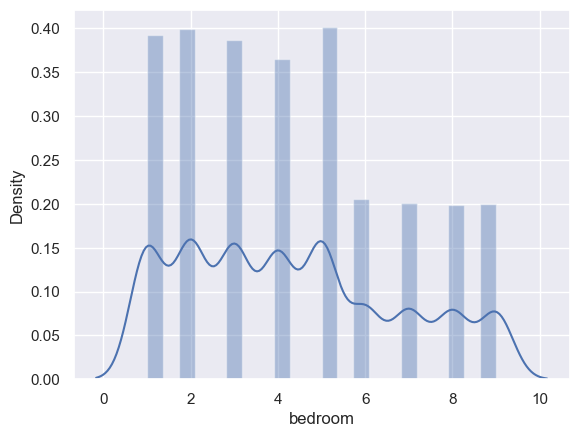

In [16]:
sns.distplot(train['bedroom'])


C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\3111997341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

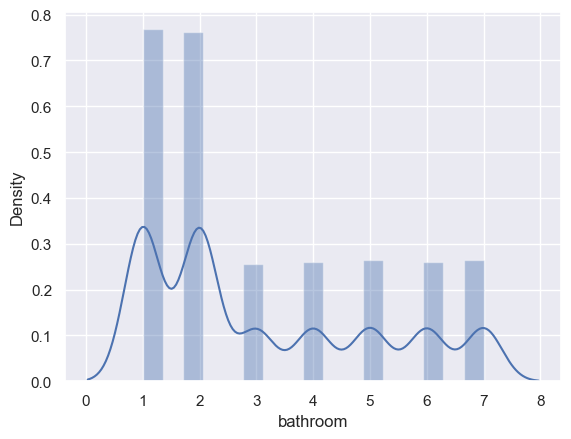

In [17]:
sns.distplot(train['bathroom'])


C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\2125594260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['parking_space'])


<Axes: xlabel='parking_space', ylabel='Density'>

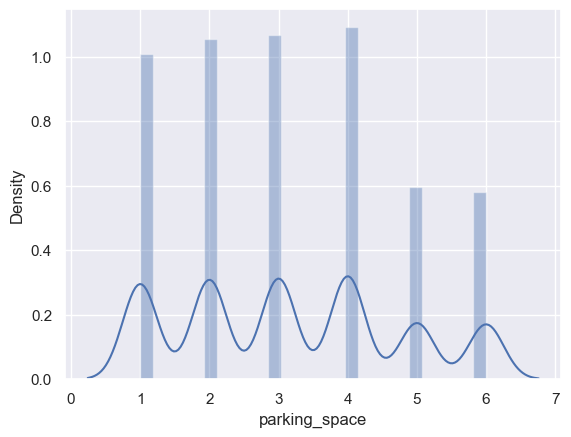

In [18]:
sns.distplot(train['parking_space'])


In [19]:
##Numeric missing data handling with median cause the values are skewed and rounding up the price to two decimal places
train['bedroom'] = train['bedroom'].fillna(train['bedroom'].median())
train['bathroom'] = train['bathroom'].fillna(train['bathroom'].median())
train['parking_space'] = train['parking_space'].fillna(train['parking_space'].median())
train['price']= train['price'].round(2)


In [20]:
train=check(train)

Missing values:
ID              0.000000
loc             0.000000
title           0.000000
bedroom         0.000000
bathroom        0.000000
parking_space   0.000000
price           0.000000
dtype: float64

Duplicated value:
0


## Action 2

## Setting the dataset Datatypes Right Using Human Thoughts and Data Science Knowledge as there cannot be floating number of bedroom,bathroom or parking_space it must be a whole number

In [21]:
train['bedroom']= train['bedroom'].astype('int64')
train['bathroom']= train['bathroom'].astype('int64')
train['parking_space']= train['parking_space'].astype('int64')




In [22]:
train.dtypes

ID                 int64
loc               object
title             object
bedroom            int64
bathroom           int64
parking_space      int64
price            float64
dtype: object

In [23]:
for i in train.columns:
    if train[i].dtypes=='O':
        print(f"\n\n{i} has {train[i].nunique()} categories, and the categories are:\n\n{train[i].unique()}")



loc has 36 categories, and the categories are:

['Kaduna' 'Akwa Ibom' 'Benue' 'Ekiti' 'Nasarawa' 'Gombe' 'Cross River'
 'Edo' 'Delta' 'Borno' 'Adamawa' 'Taraba' 'Ebonyi' 'Lagos' 'Bayelsa'
 'Enugu' 'Sokoto' 'Imo' 'Ogun' 'Osun' 'Jigawa' 'Kogi' 'Bauchi' 'Anambra'
 'Abia' 'Oyo' 'Katsina' 'Ondo' 'Rivers' 'Kwara' 'Kebbi' 'Plateau' 'Niger'
 'Zamfara' 'Kano' 'Yobe']


title has 10 categories, and the categories are:

['Mansion' 'Flat' 'Semi-detached duplex' 'Penthouse' 'Townhouse'
 'Apartment' 'Cottage' 'Bungalow' 'Terrace duplex' 'Detached duplex']


In [24]:
for i in train.columns:
    if train[i].dtypes=='int64':
        print(f"\n\n{i} has {train[i].nunique()} categories, and the categories are:\n\n{train[i].unique()}")



ID has 8629 categories, and the categories are:

[ 1071  5387  8100 ...  5328  7262 12523]


bedroom has 9 categories, and the categories are:

[5 3 4 1 8 9 2 7 6]


bathroom has 7 categories, and the categories are:

[2 1 7 6 5 4 3]


parking_space has 6 categories, and the categories are:

[3 1 5 6 4 2]


In [25]:
for i in train.columns:
    if train[i].dtypes=='float':
        print(f"\n\n{i} has {train[i].nunique()} categories, and the categories are:\n\n{train[i].unique()}")



price has 8966 categories, and the categories are:

[1844794.74 2311740.1  1935196.75 ... 2593970.51 2843936.81 2030279.8 ]


## checking if all irregularities have been put in place

In [26]:
train.duplicated().sum()


0

In [27]:
train.isnull().sum().sum()

0

In [28]:
train.head(15)

ID          loc                 title  bedroom  bathroom  \
0    1071       Kaduna               Mansion        5         2   
1    5387    Akwa Ibom                  Flat        3         1   
2    8100        Benue  Semi-detached duplex        5         2   
3   11439        Ekiti               Mansion        4         7   
4     531     Nasarawa                  Flat        1         2   
5    2134        Gombe                  Flat        1         1   
6     447  Cross River             Penthouse        4         2   
7    8816          Edo             Penthouse        8         6   
8   11655        Delta  Semi-detached duplex        9         5   
9     950       Kaduna  Semi-detached duplex        3         1   
10  10421       Kaduna             Townhouse        4         6   
11   2927        Ekiti             Apartment        1         1   
12  12102       Kaduna             Apartment        8         4   
13   8438        Borno                  Flat        2         6   
14   1996      Adamawa               Cottage        2         2   

    parking_space          price  
0               3 1844794.740000  
1               3 2311740.100000  
2               1 1935196.750000  
3               1 3647818.340000  
4               3 1060264.550000  
5               5  826199.570000  
6               1 2988362.900000  
7               6 4146174.680000  
8               3 3781399.540000  
9               1 1730987.930000  
10              4 1928036.130000  
11              6  941263.430000  
12              1 3057602.270000  
13              2 1071555.030000  
14              1 1117864.520000

## Action 3

## Checking and handling Outlier

<Axes: ylabel='price'>

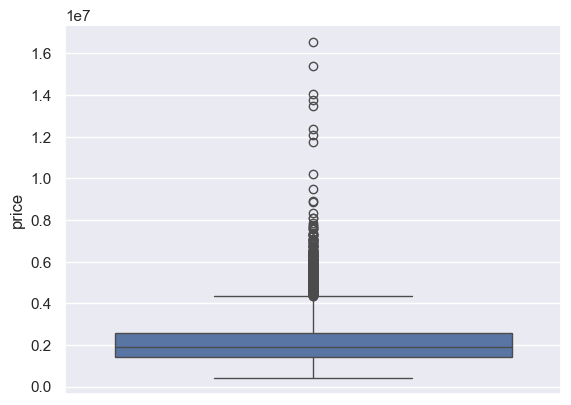

In [29]:
sns.boxplot(train['price'])

C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\256732176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


<Axes: xlabel='price', ylabel='Density'>

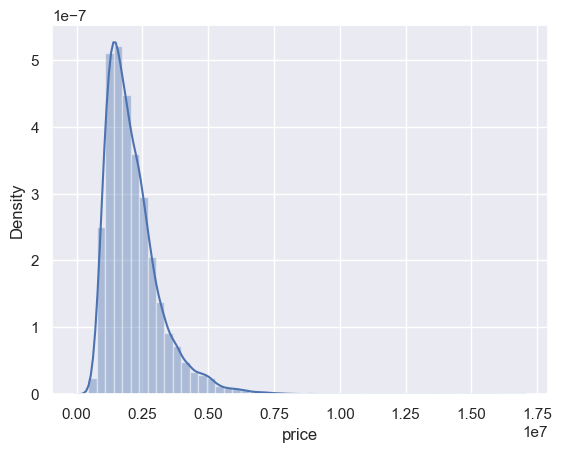

In [30]:
sns.distplot(train['price'])

In [31]:
## The Variable to be predicted is Skewed but needs to be normalized to an evenly distribution to help model predict better, preventing outlier dominace. and reduce impact of extreme values

In [32]:
#dropping Outliers
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace = True)
    return data

In [33]:
train=drop_outlier(train,'price')

C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\256732176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


<Axes: xlabel='price', ylabel='Density'>

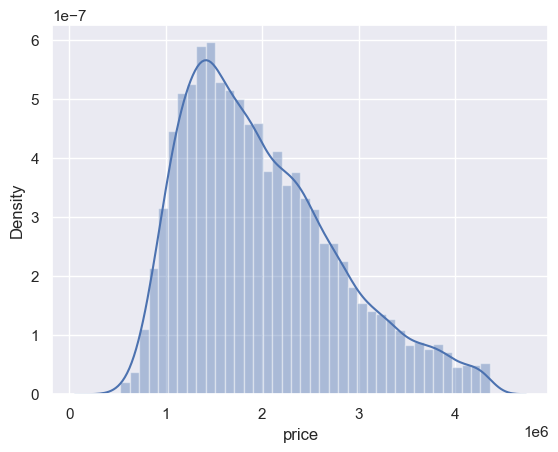

In [34]:
sns.distplot(train['price'])

## Action 4
## Dropping the iD column cause it's irrelevant cause the ID is the unique identifier and the ML can start learning patterns.

In [35]:
train.drop(['ID'],axis=1,inplace=True)

In [36]:
col1 = train.columns
col1

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

## Action 5
## Splitting data to Target(Dependent) and Variable(independent) data

In [37]:
X_train = train.drop(['price'],axis=1)
y_train = train['price']

In [38]:
cat1=[]
for i in X_train.columns:
    if X_train[i].dtype=="O":
        cat1.append(i)

## Action 6
## Encoding object columns

In [39]:
encoder= OrdinalEncoder()

X_train[cat1]=encoder.fit_transform(X_train[cat1])

## Action 7

## checking for Correlation and multicolinearity

<Axes: >

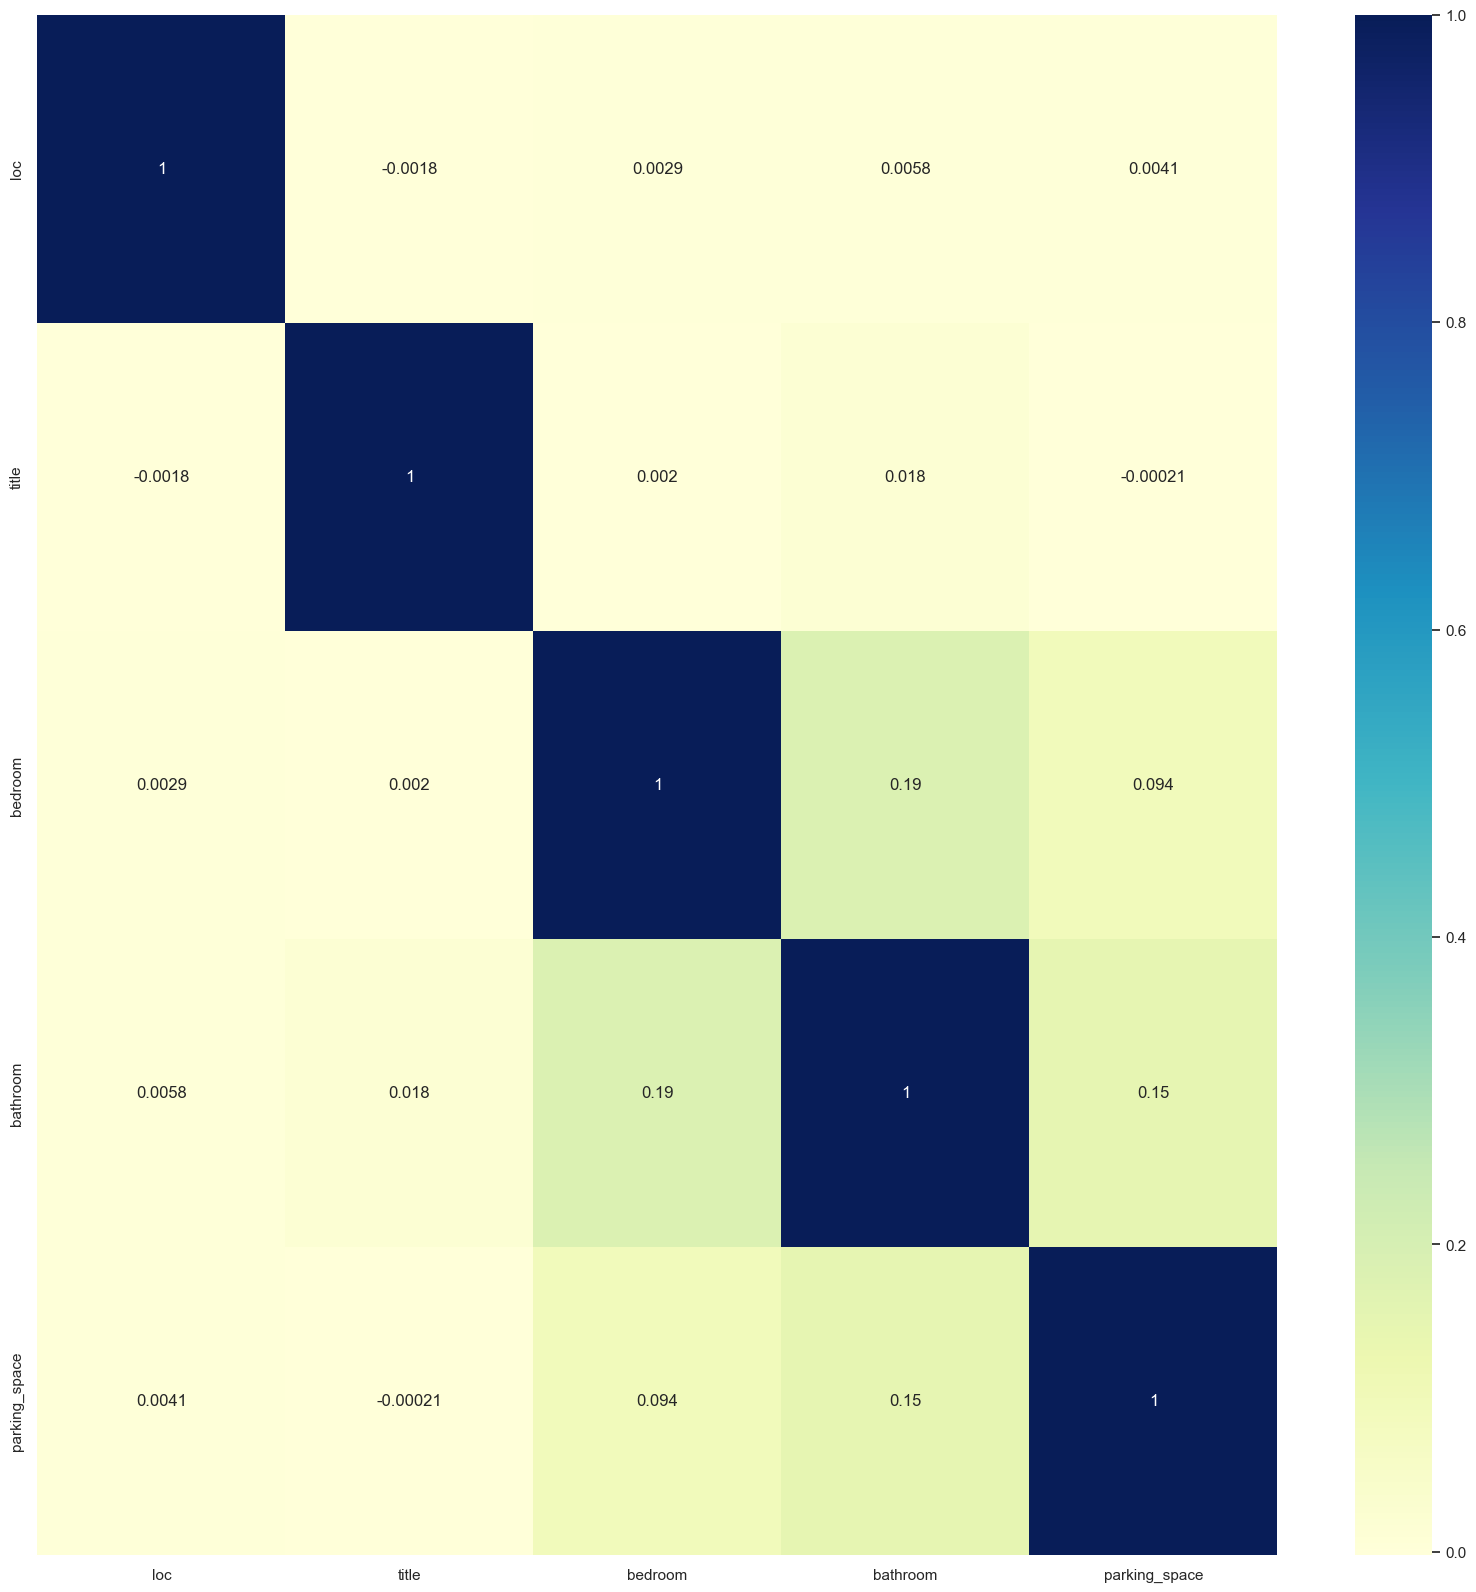

In [40]:
plt.figure(figsize=(20,20))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

<Axes: >

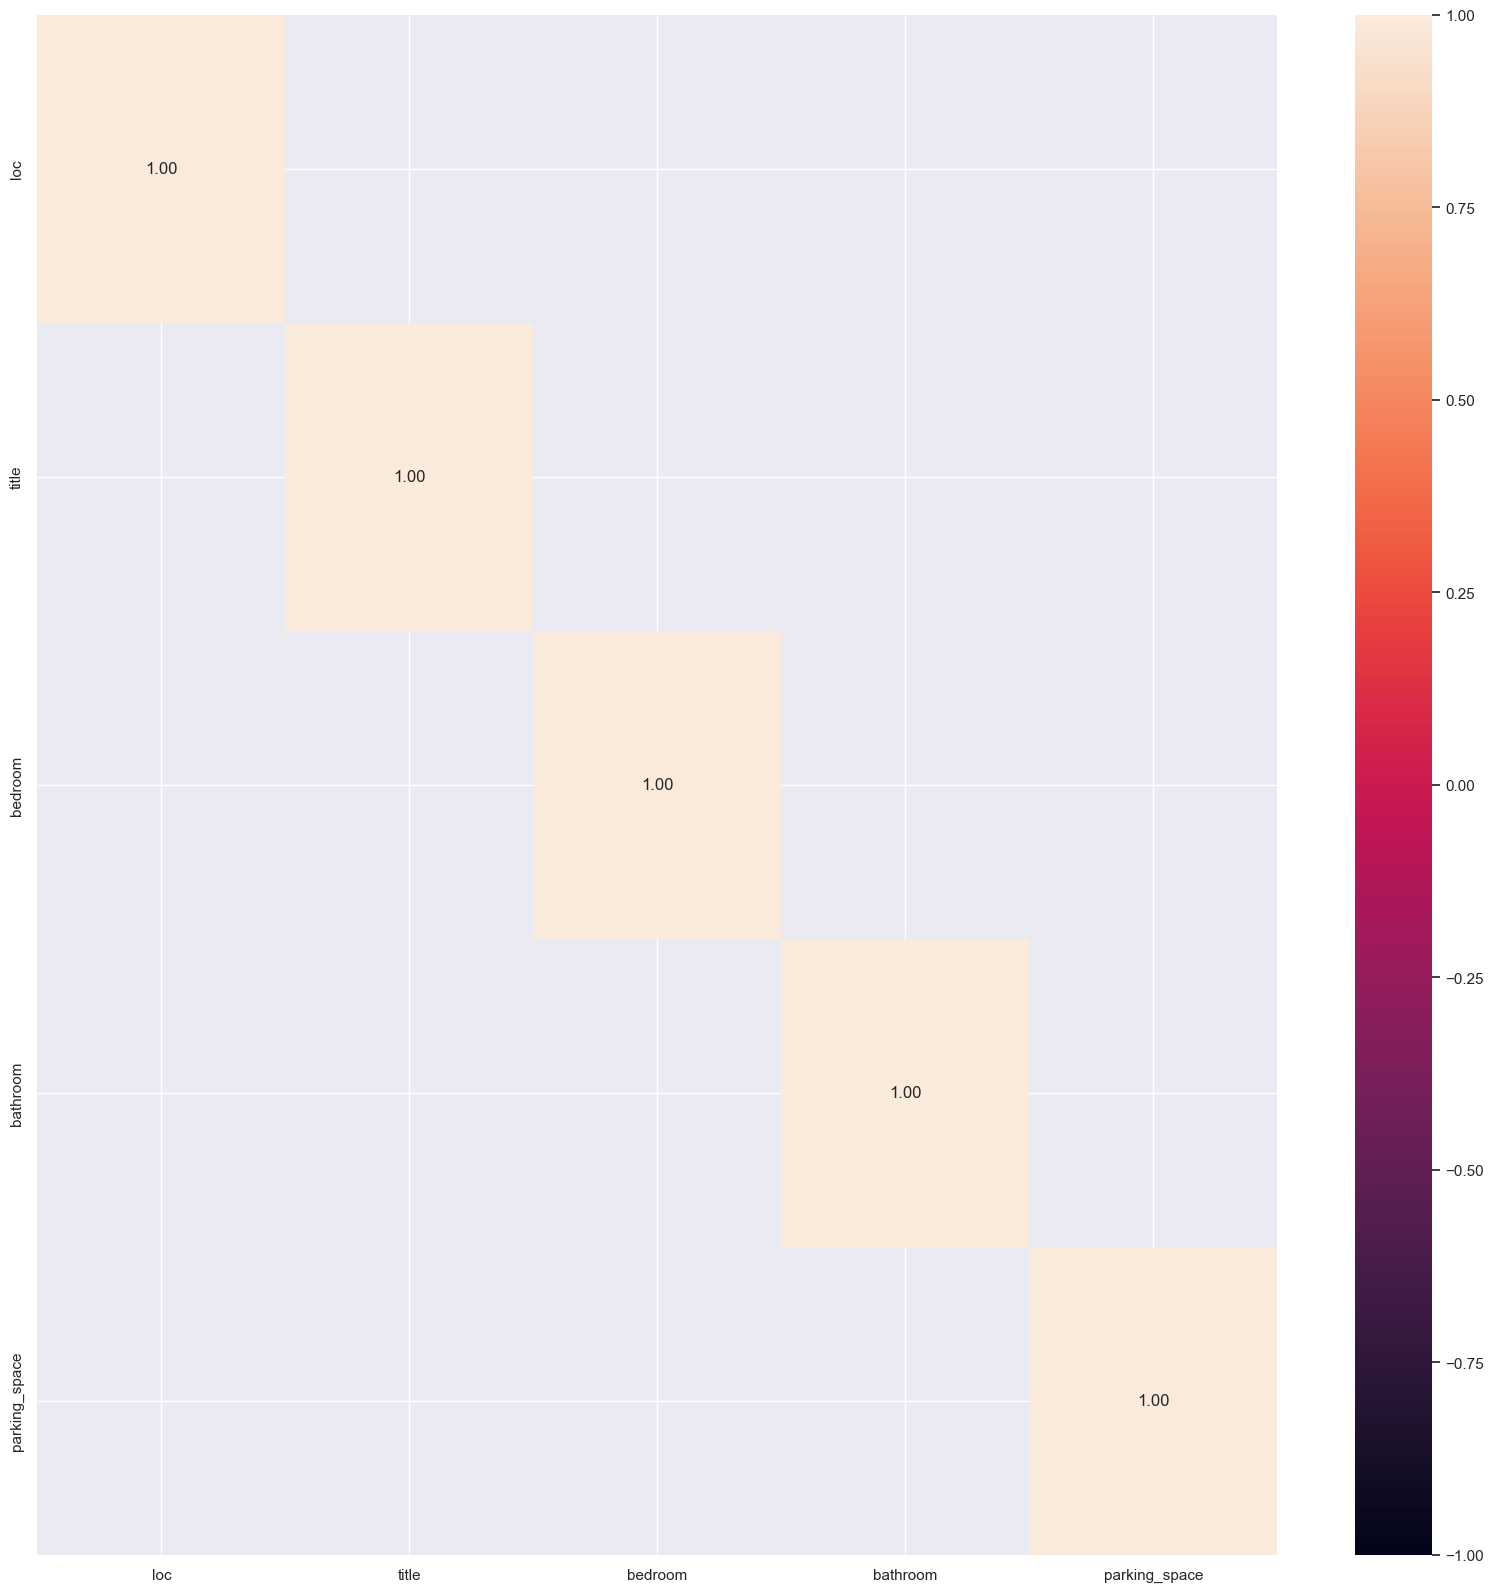

In [41]:
mask = cors[(cors >= 0.70)|(cors <= -0.70)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

In [42]:
col2 = X_train.columns 

## Action 8
## Scaling the data to reduce off Relative Magnitude

In [43]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [44]:
X_train = pd.DataFrame(X_train, columns=col2)
X_train

loc    title  bedroom  bathroom  parking_space
0     0.485714 0.555556 0.500000  0.166667       0.400000
1     0.057143 0.444444 0.250000  0.000000       0.400000
2     0.171429 0.777778 0.500000  0.166667       0.000000
3     0.342857 0.555556 0.375000  1.000000       0.000000
4     0.685714 0.444444 0.000000  0.166667       0.400000
...        ...      ...      ...       ...            ...
10727 0.485714 0.777778 0.375000  0.166667       0.000000
10728 0.457143 0.444444 0.000000  0.333333       0.000000
10729 0.142857 0.555556 0.250000  0.000000       0.000000
10730 0.428571 0.777778 0.875000  0.166667       0.800000
10731 0.485714 0.555556 0.000000  0.000000       0.400000

[10732 rows x 5 columns]

## Action 9
## Feature Selection using Features importance Techniques

In [45]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col2

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

0
bedroom       0.493936
title         0.337257
loc           0.115831
bathroom      0.041213
parking_space 0.011763

## Action 10

## A Function to pass the test data through same processs & preprocess as train to avoid any bias stages

In [46]:
def prepare(df):
    ## resetting the data index
    df.reset_index(drop=True, inplace=True)
    
    ## categorical missing data handling
    df['loc'] = df['loc'].fillna(df['loc'].mode().iloc[0])
    df['title'] = df['title'].fillna(df['title'].mode().iloc[0])

    ##Numeric missing data handling
    df['bedroom'] = df['bedroom'].fillna(df['bedroom'].median())
    df['bathroom'] = df['bathroom'].fillna(df['bathroom'].median())
    df['parking_space'] = df['parking_space'].fillna(df['parking_space'].median())
    df['price']= df['price'].round(2)
    
    ## handling the data types
    df['bedroom']= df['bedroom'].astype('int64')
    df['bathroom']= df['bathroom'].astype('int64')
    df['parking_space']= df['parking_space'].astype('int64')

    
    ## Handling outlier
    df=drop_outlier(df,'price')

    # Dropping the ID column
    
    df.drop(['ID'],axis=1,inplace=True)

    ## splitting my train dataset to dependent and independent
    X_test = df.drop(['price'],axis=1)
    y_test = df['price']

    
    ## Encoding object variable for ML
    
    cat2=['title','loc']
    

    X_test[cat2]=encoder.fit_transform(X_test[cat2])
    
    col3=X_test.columns
    ## Scaling the data so as to avoid relative magnitude
    
    X_test = scaler.transform(X_test)
    
    X_test = pd.DataFrame(X_test, columns=col3)
    return X_test, y_test



In [47]:
X_test,y_test = prepare(test)

## Action $$
## Creating a Function to pass my all my Models

In [48]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    elif input_ml_algo=='CA':
        model=CatBoostRegressor()
        
    return model

In [49]:
model_to_use('CA')

## A function to display my model, it prediction, Evaluation metrics, and draw a plot to show my regression line

In [50]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)
    print('Train R^2 score:', r2_train)
    print('Test R^2 score:', r2_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train RMSE:', rmse_train)
    print('Test RMSE:', rmse_test)

    plt.subplots(figsize=(8, 5))
    plt.scatter(y_test, y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()


## Model 1
## Linear Regression Model

Train R^2 score: 0.4039910306442307
Test R^2 score: 0.3744409432460407
Train MSE: 376491265914.66254
Test MSE: 393614104021.05383
Train RMSE: 613588.8410936615
Test RMSE: 627386.726047861


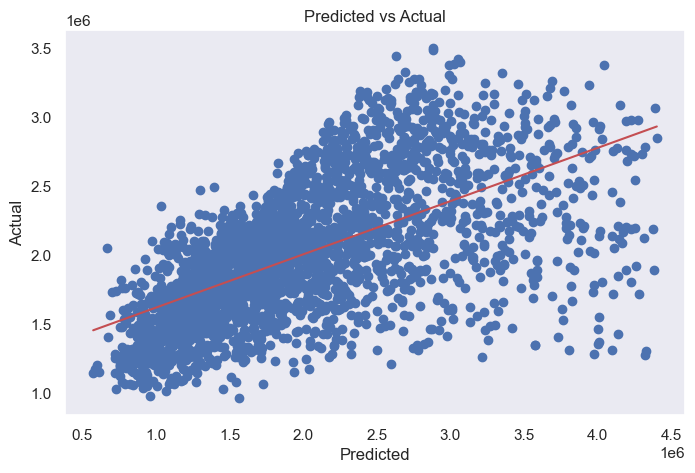

In [51]:
model1 = model_to_use("LR")
model1.fit(X_train, y_train)
evaluate(model1)

## Model 2
## Random forest model

Train R^2 score: 0.9305792594778091
Test R^2 score: 0.6708481043202457
Train MSE: 43852196567.08171
Test MSE: 207108868628.80972
Train RMSE: 209409.16065702977
Test RMSE: 455092.1539960997


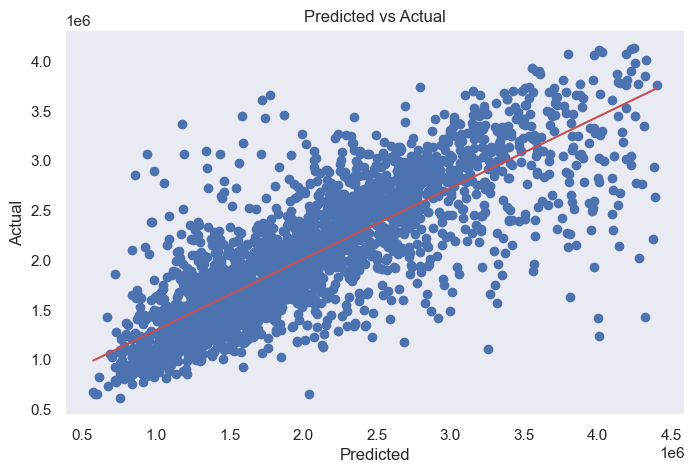

In [52]:
model2 = model_to_use("RF")
model2.fit(X_train, y_train)
evaluate(model2)

## Model 3
## K-nearest neighbor Model

Train R^2 score: 0.6626541975140245
Test R^2 score: 0.49814156188531367
Train MSE: 213097041754.63382
Test MSE: 315779233521.05237
Train RMSE: 461624.351344937
Test RMSE: 561942.375623206


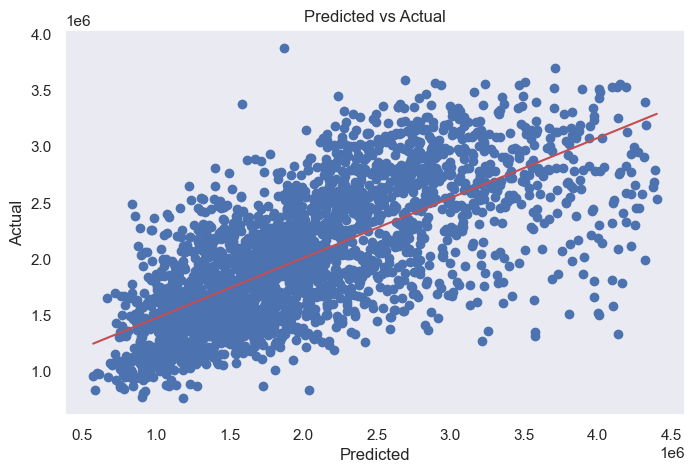

In [53]:
model3 = model_to_use("KNN")
model3.fit(X_train, y_train)
evaluate(model3)

## Model 4
## Decison Tree model

Train R^2 score: 0.9624125944024464
Test R^2 score: 0.5013254836738774
Train MSE: 23743484818.97363
Test MSE: 313775847096.4649
Train RMSE: 154089.2105858604
Test RMSE: 560156.9843324859


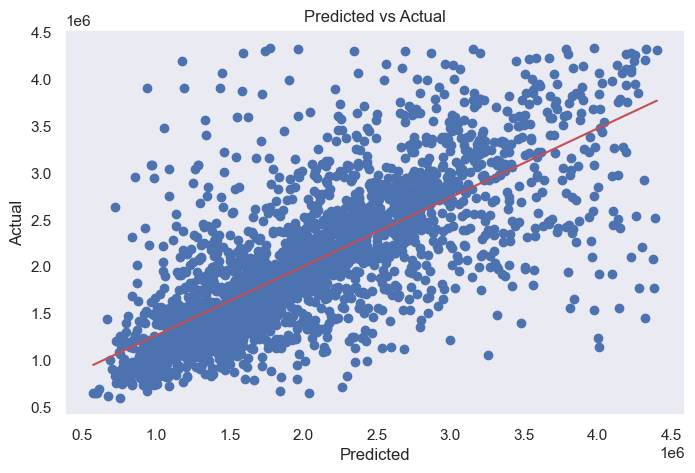

In [54]:
model4 = model_to_use("DT")
model4.fit(X_train, y_train)
evaluate(model4)

## Model 5
## LightGBM Regressor Model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 10732, number of used features: 5
[LightGBM] [Info] Start training from score 1994714.643880
Train R^2 score: 0.8080757219719183
Test R^2 score: 0.7575714493316541
Train MSE: 121236119101.78822
Test MSE: 152540828448.07227
Train RMSE: 348189.77455087367
Test RMSE: 390564.7557679421


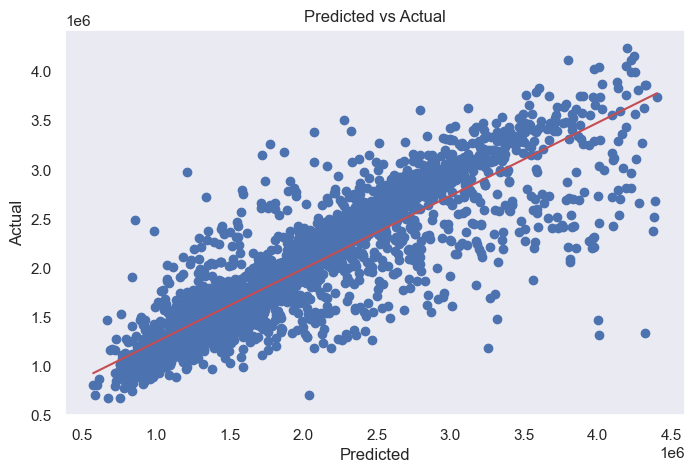

In [55]:
model5 = model_to_use("LGBMC")
model5.fit(X_train, y_train)
evaluate(model5)

## Model 6
## XGboost regressor Model

Train R^2 score: 0.8536640591942439
Test R^2 score: 0.7429544357484911
Train MSE: 92438547799.5809
Test MSE: 161738141863.77942
Train RMSE: 304037.082934929
Test RMSE: 402166.808505848


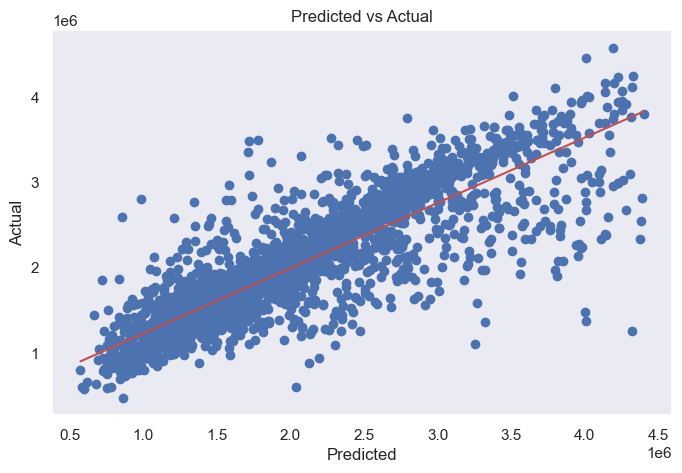

In [56]:
model6 = model_to_use("XGBC")
model6.fit(X_train, y_train)
evaluate(model6)

## Model 7

## CatBoostRegressor

Learning rate set to 0.05957
0:	learn: 769655.5921859	total: 146ms	remaining: 2m 25s
1:	learn: 746633.2542128	total: 150ms	remaining: 1m 14s
2:	learn: 725725.5824831	total: 153ms	remaining: 50.9s
3:	learn: 709464.3297726	total: 156ms	remaining: 39s
4:	learn: 691423.0023533	total: 160ms	remaining: 31.8s
5:	learn: 674949.8094711	total: 163ms	remaining: 27s
6:	learn: 663538.4089907	total: 166ms	remaining: 23.6s
7:	learn: 652926.0325523	total: 169ms	remaining: 21s
8:	learn: 639791.8748354	total: 172ms	remaining: 19s
9:	learn: 627563.8442147	total: 176ms	remaining: 17.4s
10:	learn: 619173.3594081	total: 179ms	remaining: 16.1s
11:	learn: 607826.3521920	total: 182ms	remaining: 15s
12:	learn: 598559.5474192	total: 186ms	remaining: 14.1s
13:	learn: 589899.7264606	total: 191ms	remaining: 13.4s
14:	learn: 581729.3248239	total: 195ms	remaining: 12.8s
15:	learn: 574321.1405470	total: 198ms	remaining: 12.2s
16:	learn: 567799.9567636	total: 202ms	remaining: 11.7s
17:	learn: 561023.4398742	total: 205m

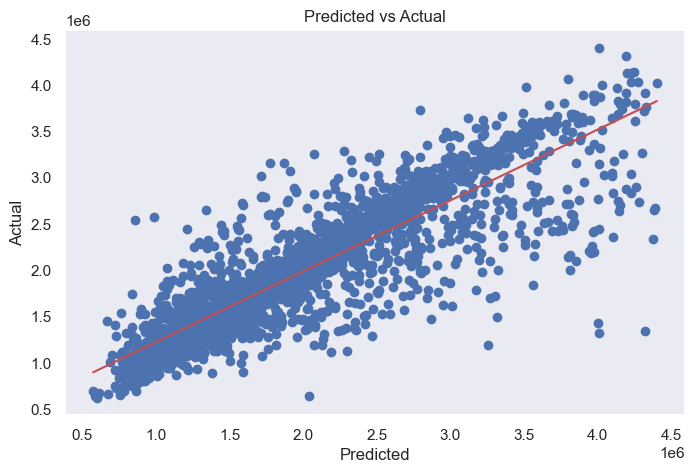

In [57]:
model7 = model_to_use("CA")
model7.fit(X_train, y_train)
evaluate(model7)

## CONCLUSION
## CatBoost
Train R²: 0.824
Interpretation: Approximately 82.4% of the variance in the training data is explained by the model.
Test R²: 0.765
Interpretation: Approximately 76.5% of the variance in the testing data is explained by the model.
Train MSE: 111,437,159,647.56
Test MSE: 148,001,244,612.16
Interpretation: The model has the lowest MSE on the test set, indicating the best performance.
Train RMSE: 333,822.05
Test RMSE: 384,709.30
Interpretation: The model's predictions are the closest to the actual values, making it the best performing model.
Conclusion
CatBoost outperforms the other models based on the test R², MSE, and RMSE. Its high test R² and low MSE/RMSE indicate that it generalizes well to the test data, offering a balance of complexity and overfitting control.

## Checking for overfitting

In [58]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model7,X_train, y_train, cv=kfold)

# Fit the model on the training data
model7.fit(X_train, y_train)

# Evaluate the model on the test data
test_score = model7.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Learning rate set to 0.057506
0:	learn: 772214.9226908	total: 3.44ms	remaining: 3.43s
1:	learn: 749875.5075922	total: 6.74ms	remaining: 3.36s
2:	learn: 733878.4724489	total: 10.7ms	remaining: 3.57s
3:	learn: 714530.2330214	total: 13.8ms	remaining: 3.44s
4:	learn: 699951.1554599	total: 16.9ms	remaining: 3.36s
5:	learn: 683380.1953770	total: 20.1ms	remaining: 3.32s
6:	learn: 668184.8394962	total: 23.5ms	remaining: 3.33s
7:	learn: 657999.9651090	total: 26.8ms	remaining: 3.33s
8:	learn: 645388.5341311	total: 30ms	remaining: 3.31s
9:	learn: 633888.4987900	total: 32.9ms	remaining: 3.26s
10:	learn: 625399.3857858	total: 36.1ms	remaining: 3.24s
11:	learn: 614268.7032848	total: 41.1ms	remaining: 3.38s
12:	learn: 604927.1430862	total: 47ms	remaining: 3.57s
13:	learn: 596286.9033846	total: 51.1ms	remaining: 3.6s
14:	learn: 588153.4029303	total: 56.2ms	remaining: 3.69s
15:	learn: 580705.5069093	total: 60.8ms	remaining: 3.74s
16:	learn: 574103.6023930	total: 64.7ms	remaining: 3.74s
17:	learn: 56846

## Cross-Validation Scores
Cross-validation helps in assessing the model's ability to generalize to an independent dataset. The scores you provided are from k-fold cross-validation, where the data is split into 
𝑘
k subsets, and the model is trained 
𝑘
k times, each time using a different subset as the validation set and the remaining 
𝑘
−
1
k−1 subsets as the training set. The scores obtained are:

Fold 1: 0.78389428
Fold 2: 0.76816893
Fold 3: 0.78761960
Fold 4: 0.76664763
Fold 5: 0.78868511
Average Cross-Validation Score: 0.7790031101184803
Test Score: 0.764786073384601

Interpretation
Cross-Validation Scores
Consistency: The cross-validation scores are quite consistent, ranging from approximately 0.766 to 0.789. This indicates that the model performs reliably across different subsets of the data, suggesting robustness.
Average Score: The average cross-validation score of 0.779 indicates that, on average, the model explains about 77.9% of the variance in the data across different training-validation splits.
Comparison with Test Score
Test Score: The test score of 0.764786073384601 is slightly lower than the average cross-validation score. This is expected and suggests that the model generalizes well to unseen data.
Difference: The small difference between the average cross-validation score (0.779) and the test score (0.765) indicates that there is no significant overfitting or underfitting. The model's performance on the test set is close to its performance on the validation sets during cross-validation.
Conclusion
Model Generalization: The CatBoost model generalizes well to new data. The close alignment between the cross-validation scores and the test score indicates that the model is neither overfitting nor underfitting, striking a good balance.

Robust Performance: The consistency in cross-validation scores across folds suggests that the model is robust and performs reliably across different subsets of the data.

Summary
Based on the cross-validation and test scores, it can be concluded that the CatBoost model is performing optimally:

High Cross-Validation Scores: Indicating robust performance across various data splits.
Consistent Test Score: Reinforcing the model's ability to generalize well to unseen data.

## Fine Tunning

In [60]:
import pickle
from pickle import dump
# save the model
dump(model7, open('CatBoost_model.pkl', 'wb'))

# save encoder
dump(encoder, open('enc.pkl', 'wb'))

# save scaler
dump(scaler, open('scal.pkl', 'wb'))

## Bringing the data to test for model

In [61]:
new_data=pd.read_csv('Housing_dataset_test.csv')

In [62]:
new_data.head(20)

ID      loc                 title  bedroom  bathroom  parking_space
0     845     Kano             Penthouse        4         1              2
1    1924  Adamawa             Apartment        2         2              4
2   10718  Adamawa              Bungalow        2         7              2
3   12076    Lagos               Mansion        9         5              2
4   12254    Gombe  Semi-detached duplex        5         6              1
5    9950      Edo       Detached duplex        6         4              5
6    1548    Niger                  Flat        9         3              4
7     526  Anambra                  Flat        1         1              4
8    6776    Niger                  Flat        1         5              1
9    1851  Adamawa              Bungalow        4         1              4
10   9188    Benue       Detached duplex        3         6              4
11   3382     Ogun              Bungalow        9         3              2
12    242     Kogi              Bungalow        9         2              4
13   6439   Taraba                  Flat        6         3              1
14   1561     Kano  Semi-detached duplex        8         2              1
15   5339     Yobe              Bungalow        9         6              4
16   7387     Ogun             Townhouse        4         3              4
17  11576     Kano             Townhouse        3         3              6
18   5984    Benue               Mansion        9         4              3
19   4486    Niger       Detached duplex        4         1              3

In [63]:
new=check(new_data)

Missing values:
ID              0.000000
loc             0.000000
title           0.000000
bedroom         0.000000
bathroom        0.000000
parking_space   0.000000
dtype: float64

Duplicated value:
0


In [64]:
new_data.shape

(6000, 6)

In [65]:
new_data.dtypes

ID                int64
loc              object
title            object
bedroom           int64
bathroom          int64
parking_space     int64
dtype: object

## A function to make prediction base on my model(LGBMC Model) using the test dataset

In [67]:
def prep(new_data):
    ## resetting the data index
    df.reset_index(drop=True, inplace=True)

    # Dropping the ID column
    cust= new_data['ID']
    
    new_data.drop(['ID'],axis=1,inplace=True)
    
    
    ## Encoding object variable for ML
    
    cat2=['title','loc']
    

    new_data[cat2]=encoder.fit_transform(new_data[cat2])
    
    col3=new_data.columns
    
    new_data = scaler.transform(new_data)
    
    new_data = pd.DataFrame(new_data, columns=col3)
    
    ## dropping the target leakage feature as it was engineered out from the target attributes
    #X_test.drop(['avg_price_per_loc'], axis=1,inplace=True)
    
    
    return cust, new_data



In [68]:
cust,c_data = prep(new_data)

In [69]:
c_data

loc    title  bedroom  bathroom  parking_space
0    0.514286 0.666667 0.375000  0.000000       0.200000
1    0.028571 0.000000 0.125000  0.166667       0.600000
2    0.028571 0.111111 0.125000  1.000000       0.200000
3    0.657143 0.555556 1.000000  0.666667       0.200000
4    0.400000 0.777778 0.500000  0.833333       0.000000
...       ...      ...      ...       ...            ...
5995 0.342857 0.444444 0.375000  0.666667       0.200000
5996 0.028571 0.888889 0.500000  1.000000       0.000000
5997 0.828571 1.000000 0.375000  0.000000       0.600000
5998 0.114286 0.444444 0.250000  1.000000       0.800000
5999 0.914286 0.555556 0.625000  0.000000       1.000000

[6000 rows x 5 columns]

In [70]:
pred= model7.predict(c_data)
pred

array([2289270.58734279, 1050504.40841607, 1132531.57747807, ...,
       1882146.17019824, 1646921.10013919, 3403575.06639532])

## Action
## Putting my predictions into a data frame

In [71]:
results = pd.DataFrame({'ID':cust,"Price_pred":pred})

In [72]:
results.head(10)

ID     Price_pred
0    845 2289270.587343
1   1924 1050504.408416
2  10718 1132531.577478
3  12076 5737672.422388
4  12254 1952070.627689
5   9950 2886766.288711
6   1548 2652695.981140
7    526 1582801.899081
8   6776 1195888.241137
9   1851 1419070.546117

# Action 
## Saving my prediction and the ID column

In [75]:
results.to_csv("Emmnauel_Tobi_Michael_Submission.csv",index=False)


## Deploying my Model to a streamlit App 

In [80]:
%%writefile PRIME_ESTATE_SOLUTIONS.py
import streamlit as st
import pandas as pd
import pickle
from PIL import Image
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
import time
import base64

# Set the theme and layout
st.set_page_config(
    page_title="PRIME ESTATE SOLUTION PRICING PREDICTION APP",
    page_icon="🏠",
    layout="wide",  # Use 'centered' or 'wide'
    initial_sidebar_state="expanded"  # Use 'expanded' or 'collapsed'
)

# Custom CSS
css = """
body {
    background-color: #f0f0f0;
    font-family: "Helvetica Neue", Arial, sans-serif;
}
h1 {
    color: #007BFF;
}
"""
st.markdown(f'<style>{css}</style>', unsafe_allow_html=True)

# Load the pre-trained model and preprocessing objects
model = pickle.load(open('CatBoost_model.pkl', 'rb'))
scaler = pickle.load(open('scal.pkl', 'rb'))
encoder = pickle.load(open('enc.pkl', 'rb'))

# Define the 'prep' function for data preparation
def prep(new_data):
    # Make a copy of the input DataFrame to avoid modifying the original data
    new_data_copy = new_data.copy()

    # Dropping the 'ID' column and storing it in 'cust'
    cust = new_data_copy['ID']
    new_data_copy.drop(['ID'], axis=1, inplace=True)

    # Encoding object variables for ML
    cat_cols = ['title', 'loc']
    new_data_copy[cat_cols] = encoder.transform(new_data_copy[cat_cols])

    # Scaling the numeric features
    col_names = new_data_copy.columns
    new_data_copy = scaler.transform(new_data_copy)
    new_data_copy = pd.DataFrame(new_data_copy, columns=col_names)

    return cust, new_data_copy

def main():
      ## side bar
    img=Image.open("ETm.jpg")
    st.sidebar.image(img.resize((1280,780)))
    
    ##Real estate name
    st.sidebar.title("")
   
     #Web name
    st.title("Real Estate House Price Prediction WebApp")
    
     # Add an image
    image_path = "thp.jpg"# Update with the correct path
    banner_width = 1200  # Set the width in pixels
    banner_height = 400  # Set the height in pixels 
    st.image(image_path, width= banner_width)

    

    # Upload a CSV file and get user input
    uploaded_file = st.sidebar.file_uploader("Upload A CSV", type='csv')

    if uploaded_file is not None:
        # Read the uploaded CSV file into a dataframe
        df = pd.read_csv(uploaded_file)

        # Perform data preparation using the 'prep' function
        cust, prepared_data = prep(df)

        # Display the uploaded data
        st.subheader("Uploaded Data:")
        st.write(df)

        # Display the prepared data
        st.subheader("Prepared Data:")
        st.write(prepared_data)
        
        # Add Filter Options
        st.sidebar.subheader("Filter Options")
        price_range_1M_to_2_5M = st.sidebar.checkbox("1M to 2.5M")
        price_range_3M_to_5M = st.sidebar.checkbox("3M to 5M")


        # Perform model predictions
        if st.button('Predict'):
            with st.spinner("Predicting..."):
                pred = model.predict(prepared_data)
                results = pd.DataFrame({'ID': cust, "Price_Prediction": pred})
                time.sleep(2)
                st.subheader("Price Predictions:")
                st.write(results)
               # Display download button without clearing the displayed dataframe
            st.markdown(get_download_link(results), unsafe_allow_html=True)
                 # Filter IDs based on selected price ranges
            if price_range_1M_to_2_5M:
                filtered_ids_1M_to_2_5M = results.loc[(results['Price_Prediction'] >= 1000000) & (results['Price_Prediction'] <= 2500000), 'ID'].tolist()
                st.subheader("IDs with Price between 1M and 2.5M:")
                st.write(filtered_ids_1M_to_2_5M)

            if price_range_3M_to_5M:
                filtered_ids_3M_to_5M = results.loc[(results['Price_Prediction'] >= 3000000) & (results['Price_Prediction'] <= 5000000), 'ID'].tolist()
                st.subheader("IDs with Price between 3M and 5M:")
                st.write(filtered_ids_3M_to_5M)

            # Provide download buttons for prediction results
                csv1 = results.to_csv(index=False)
                st.download_button('Download Predictions', csv1, file_name='Price_predictions.csv')
                 # Show "Task completed successfully!" after the prediction is completed
            st.success("Price Prediction completed successfully!")
def get_download_link(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()
    href = f'<a href="data:file/csv;base64,{b64}" download="predicted_new_values.csv">Download Predicted Values</a>'
    return href

if __name__ == "__main__":
    main()


Writing PRIME_ESTATE_SOLUTIONS.py


In [78]:
! pip install streamlit

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.0/8.7 MB 393.8 kB/s eta 0:00:22
   ---------------------------------------- 0.0/8.7 MB 393.8 kB/s eta 0:00:22
   ---------------------------------------- 0.1/8.7 MB 328.6 kB/s eta 0:00:27
   ---------------------------------------- 0.1/8.7 MB 403.5 kB/s eta 0:00:22
    --------------------------------------- 0.1/8.7 MB 502.3 kB/s eta 0:00:17
    --------------------------------------- 0.1/8.7 MB 502.3 kB/s eta 0:00:17
   - -------------------------------------- 0.2/8.7 MB 573.4 kB/s eta 0:00:15
   - -------------------------------------- 0.2/8.7 MB 535.1 kB/s eta 0:00:16
   - -------------------------------------- 0.3/8.7 MB 609.2 kB/s eta 0:00:14
   - ----------


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Action
## EDA

In [86]:
eda=pd.read_csv('Housing_dataset_train.csv')

In [87]:
eda.head()

ID      loc                 title  bedroom  bathroom  parking_space  \
0   3583  Katsina  Semi-detached duplex 2.000000  2.000000       1.000000   
1   2748     Ondo             Apartment      NaN  2.000000       4.000000   
2   9261    Ekiti                   NaN 7.000000  5.000000            NaN   
3   2224  Anambra       Detached duplex 5.000000  2.000000       4.000000   
4  10300     Kogi        Terrace duplex      NaN  5.000000       6.000000   

           price  
0 1149999.565000  
1 1672416.689000  
2 3364799.814000  
3 2410306.756000  
4 2600700.898000

In [88]:
def pr(df):
    ## resetting the data index
    df.reset_index(drop=True, inplace=True)
    
    ## categorical missing data handling
    df['loc'] = df['loc'].fillna(df['loc'].mode().iloc[0])
    df['title'] = df['title'].fillna(df['title'].mode().iloc[0])

    ##Numeric missing data handling
    df['bedroom'] = df['bedroom'].fillna(df['bedroom'].mean())
    df['bathroom'] = df['bathroom'].fillna(df['bathroom'].mean())
    df['parking_space'] = df['parking_space'].fillna(df['parking_space'].mean())
    df['price']= df['price'].round(2)
    
    ## handling the data types
    df['bedroom']= df['bedroom'].astype('int64')
    df['bathroom']= df['bathroom'].astype('int64')
    df['parking_space']= df['parking_space'].astype('int64')

    ## Feature engr
    average_price_per_loc = df.groupby('loc')['price'].mean()
    df['avg_price_per_loc'] = df['loc'].map(average_price_per_loc)
    
   
    
    return df


In [90]:
eda=pr(eda)

In [91]:
eda.head(20)

ID      loc                 title  bedroom  bathroom  parking_space  \
0    3583  Katsina  Semi-detached duplex        2         2              1   
1    2748     Ondo             Apartment        4         2              4   
2    9261    Ekiti                  Flat        7         5              3   
3    2224  Anambra       Detached duplex        5         2              4   
4   10300     Kogi        Terrace duplex        4         5              6   
5    1733    Borno               Mansion        4         1              3   
6    7892    Kwara              Bungalow        4         4              4   
7    3003  Katsina             Penthouse        3         3              5   
8     555     Osun  Semi-detached duplex        4         1              2   
9    3085   Kaduna             Penthouse        4         3              3   
10  12573     Ogun              Bungalow        1         2              6   
11   2624  Bayelsa             Apartment        3         4              2   
12   3753   Kaduna                  Flat        5         3              5   
13     42    Borno        Terrace duplex        4         2              3   
14   3897     Abia        Terrace duplex        3         3              3   
15   6184   Rivers             Townhouse        2         2              2   
16    488     Ondo                  Flat        4         2              2   
17   2524   Taraba        Terrace duplex        1         3              4   
18   2599   Ebonyi             Apartment        5         2              1   
19   3389   Kaduna                  Flat        5         1              1   

            price  avg_price_per_loc  
0  1149999.560000     1947589.325333  
1  1672416.690000     2277494.184855  
2  3364799.810000     2109220.250476  
3  2410306.760000     2337230.071433  
4  2600700.900000     1763415.899283  
5  1341750.870000     1735703.591567  
6  2125789.780000     1903423.946967  
7  2043107.590000     1947589.325333  
8  1219453.880000     2180569.608047  
9  2710664.870000     2115428.661622  
10 1330213.040000     2564020.376841  
11 1891772.070000     3112321.668382  
12 2087592.810000     2115428.661622  
13 1492509.360000     1735703.591567  
14 1293794.280000     1717083.361442  
15 2028777.000000     2957097.574520  
16 1851837.900000     2277494.184855  
17 1065123.440000     1855305.760730  
18 1272895.730000     1635849.637832  
19 1424308.200000     2115428.661622

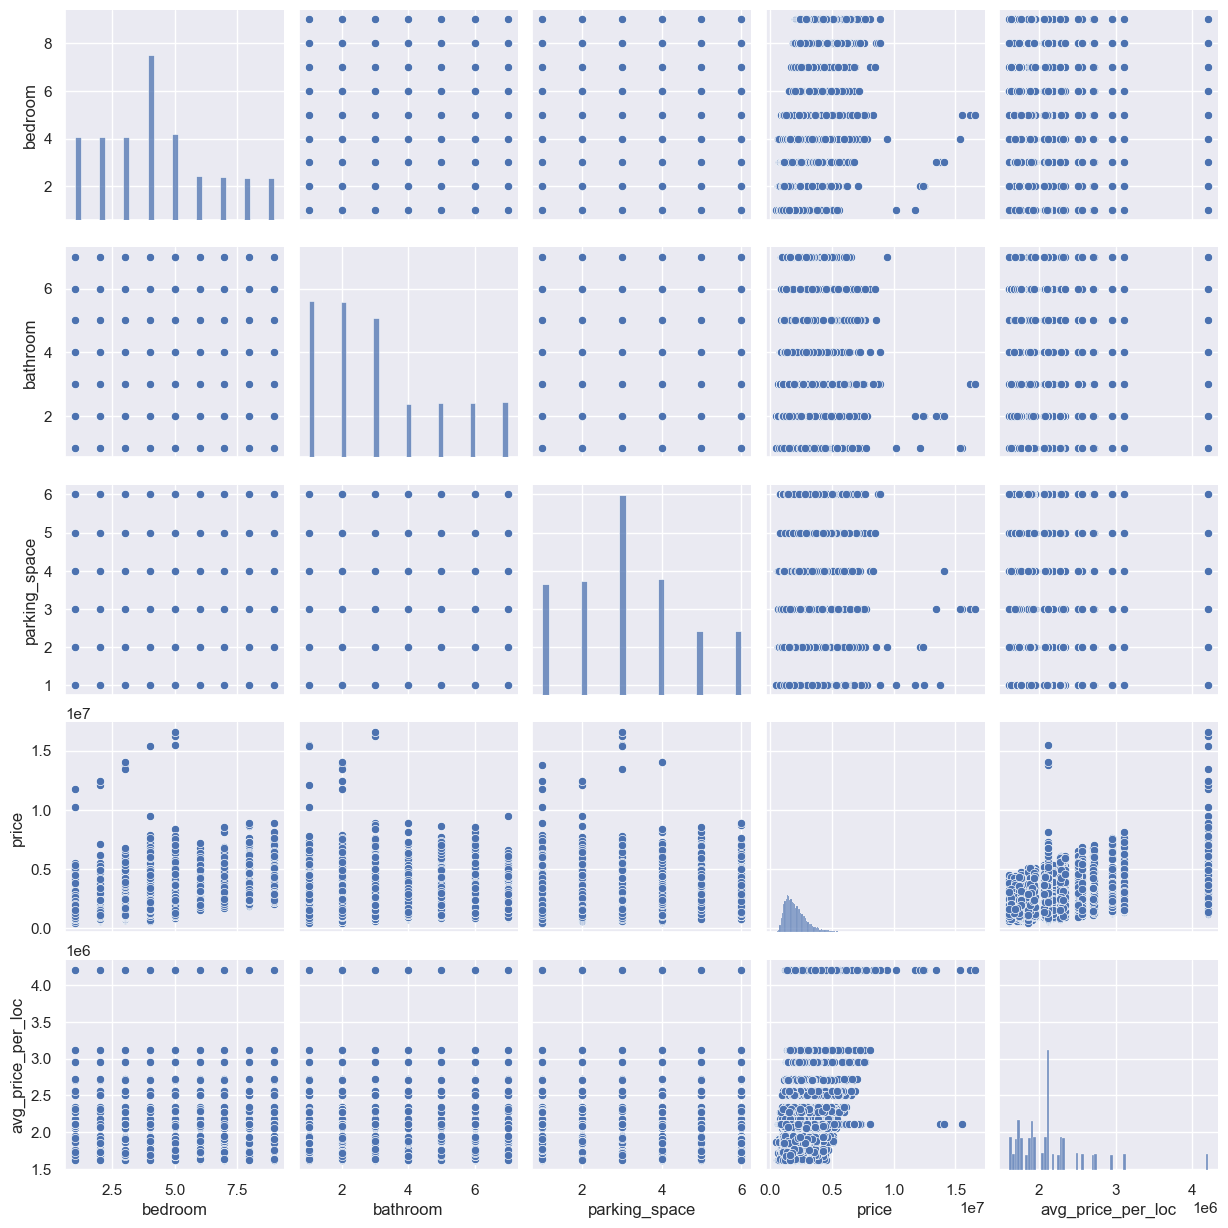

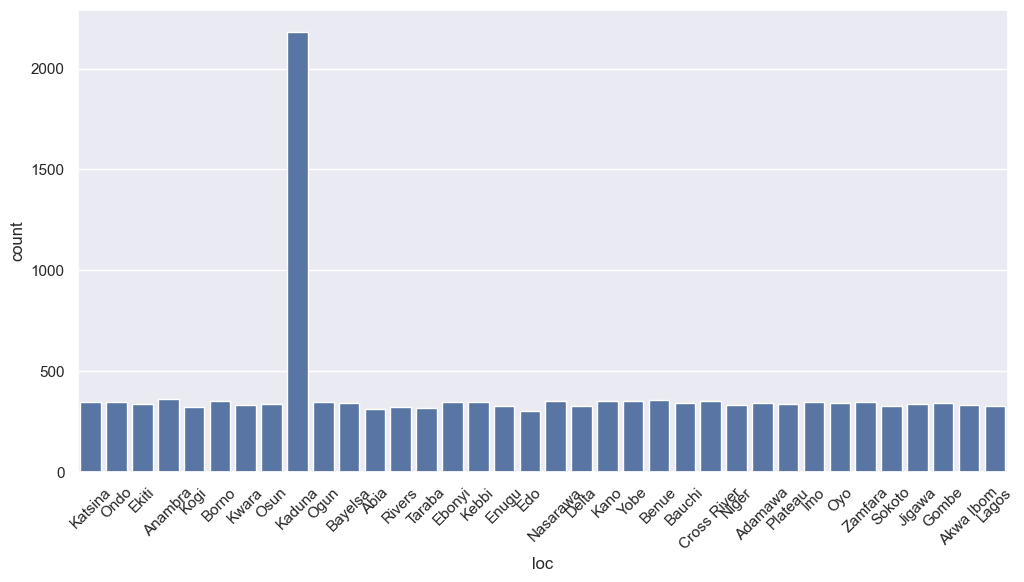

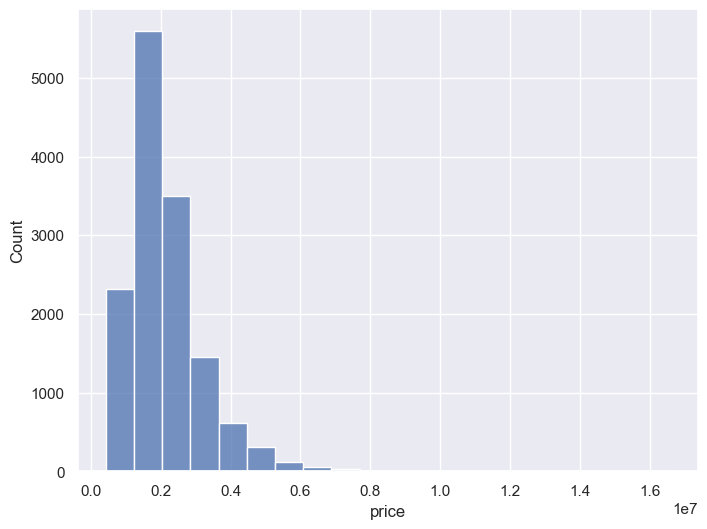

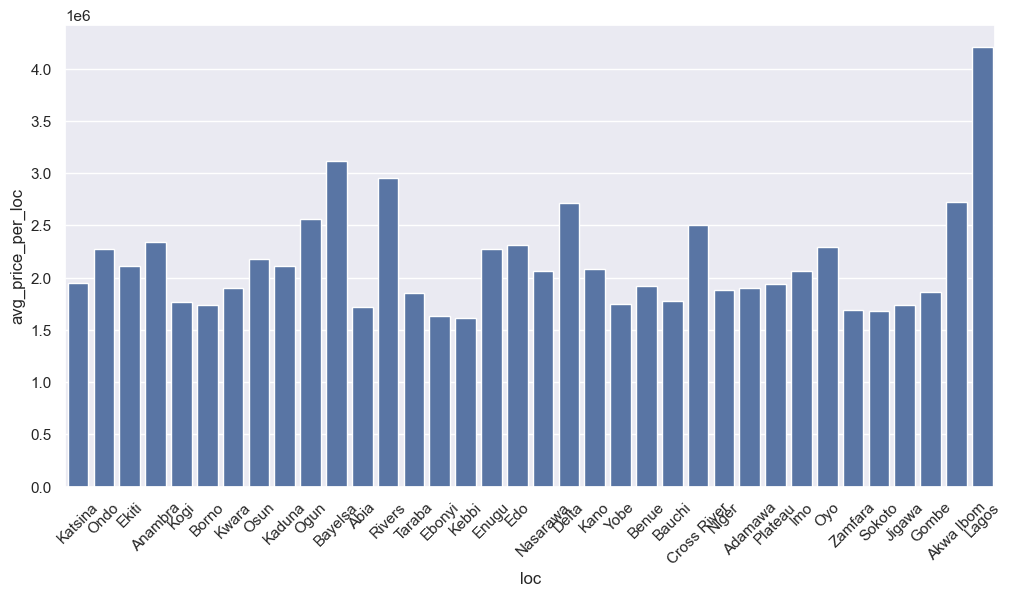

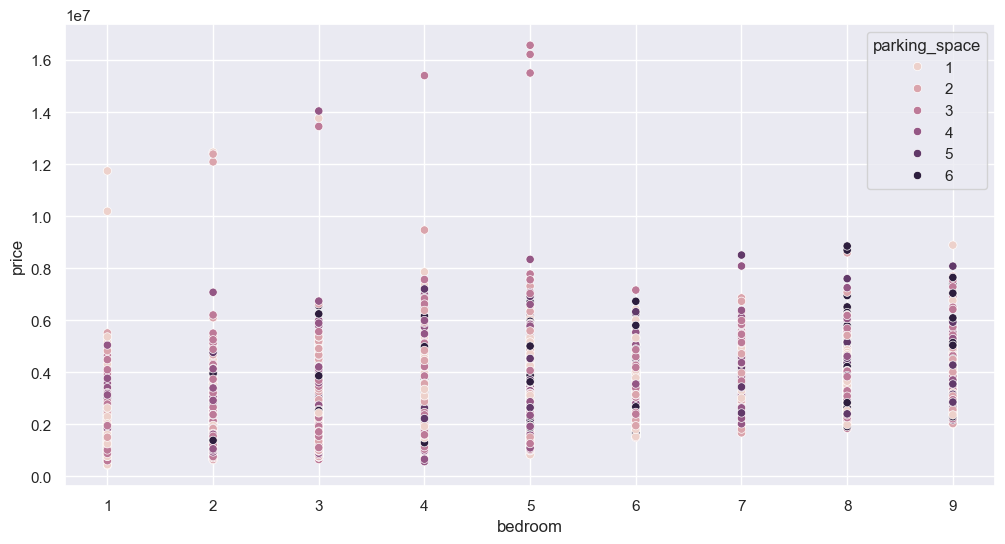

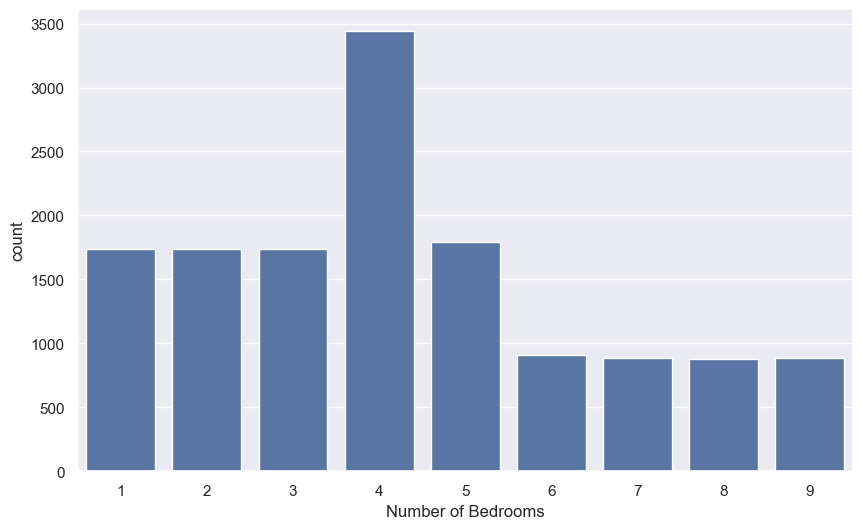

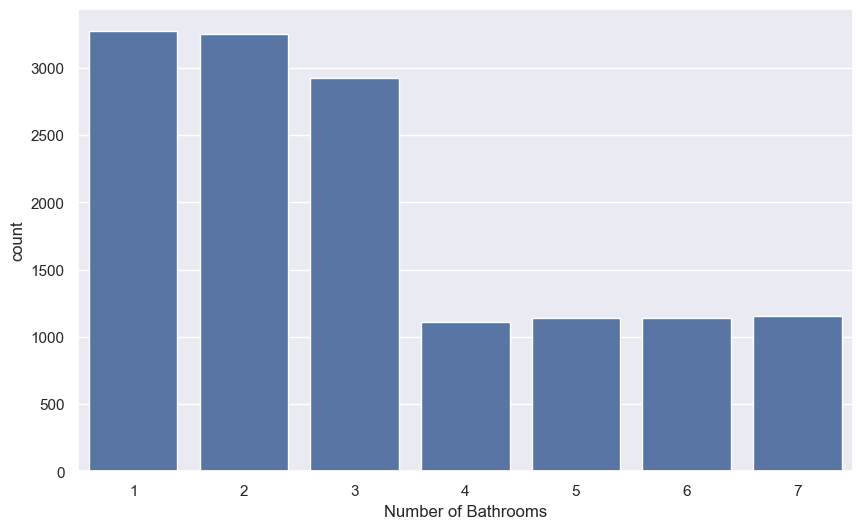

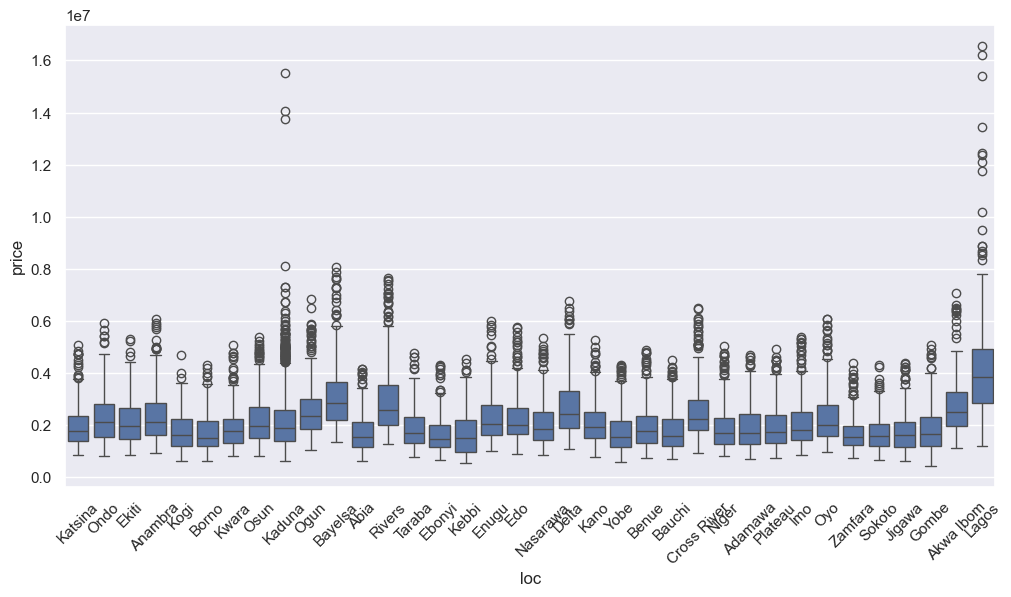

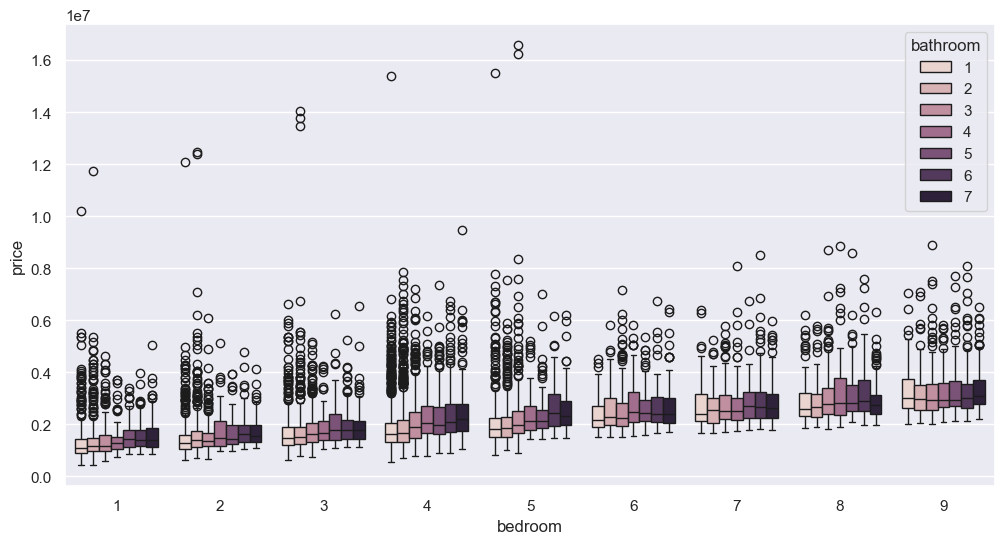

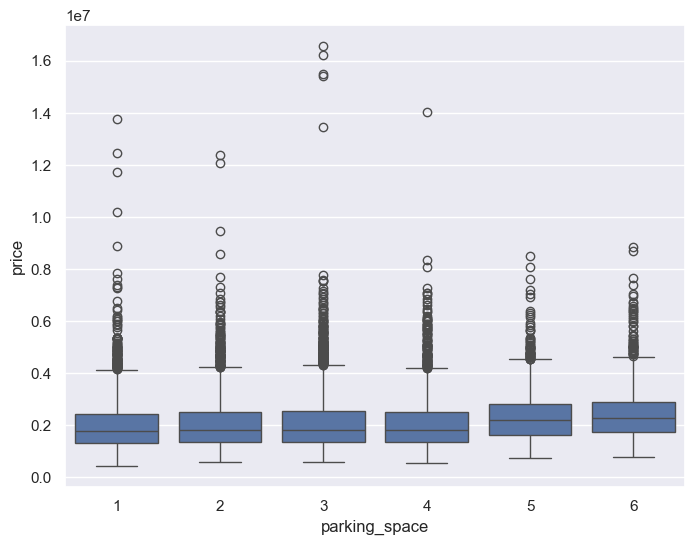

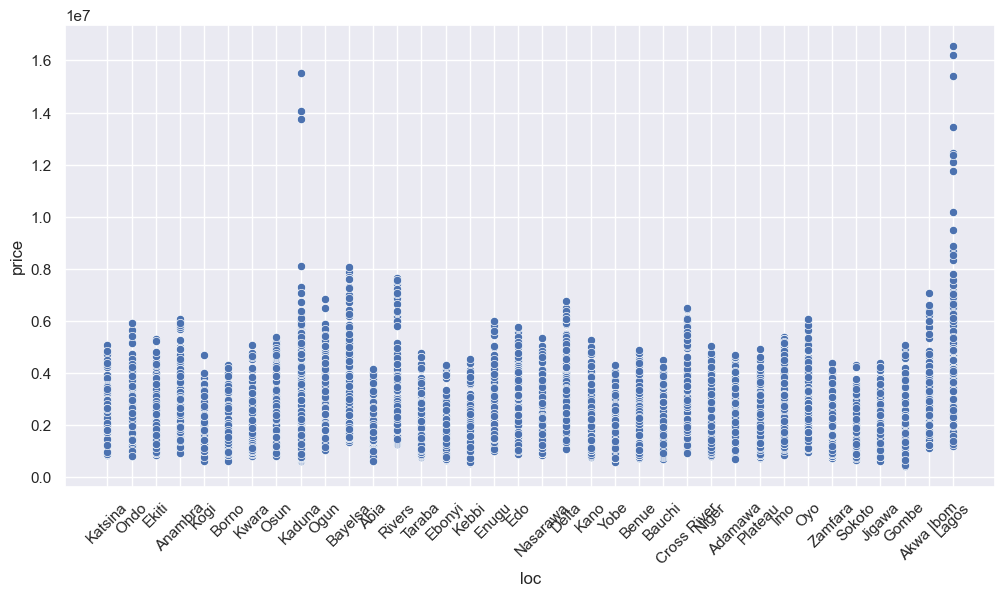

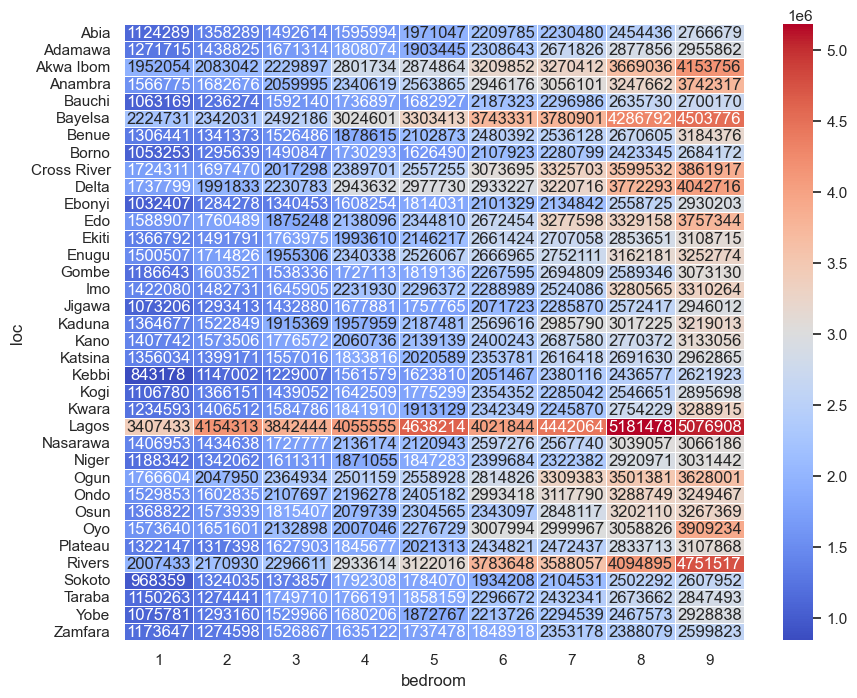

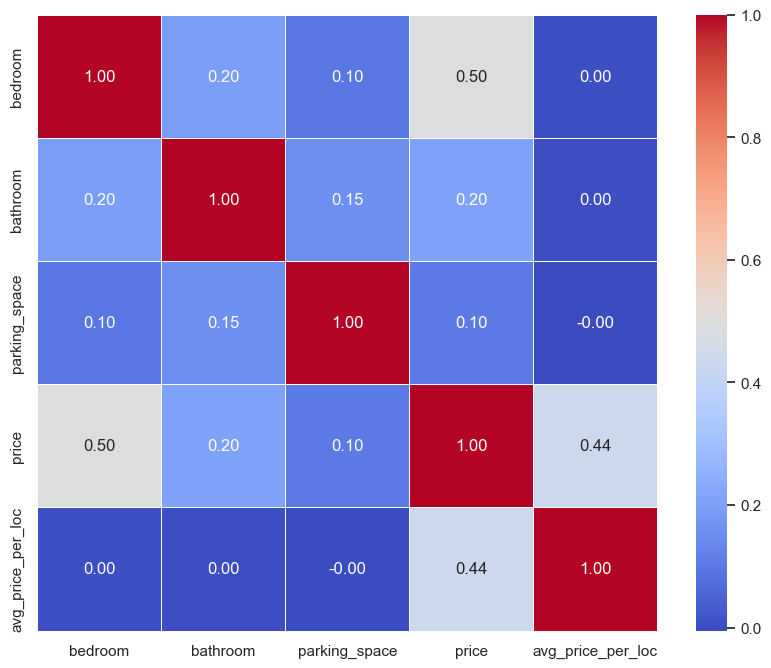

C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\215596907.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=eda, x='bedroom', y='avg_price_per_loc', hue='bathroom', ci=None)


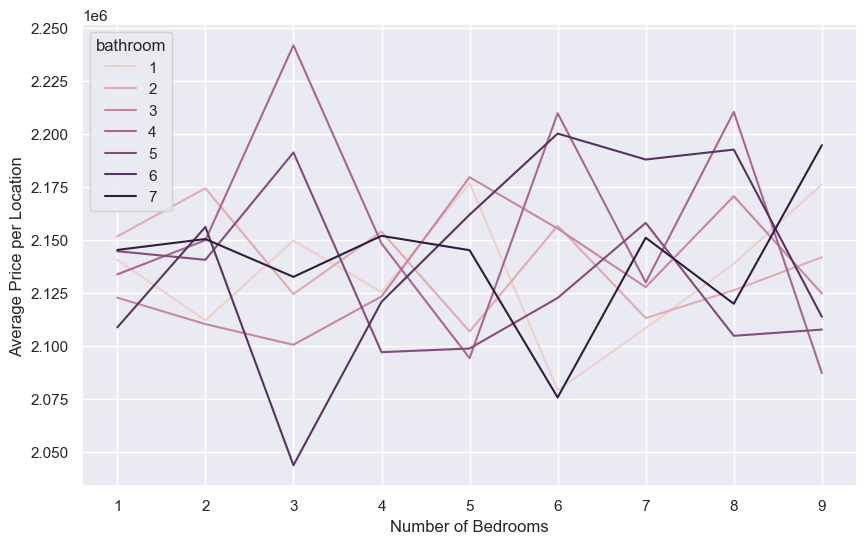

C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\215596907.py:87: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=eda, x='parking_space', y='avg_price_per_loc', ci=None)


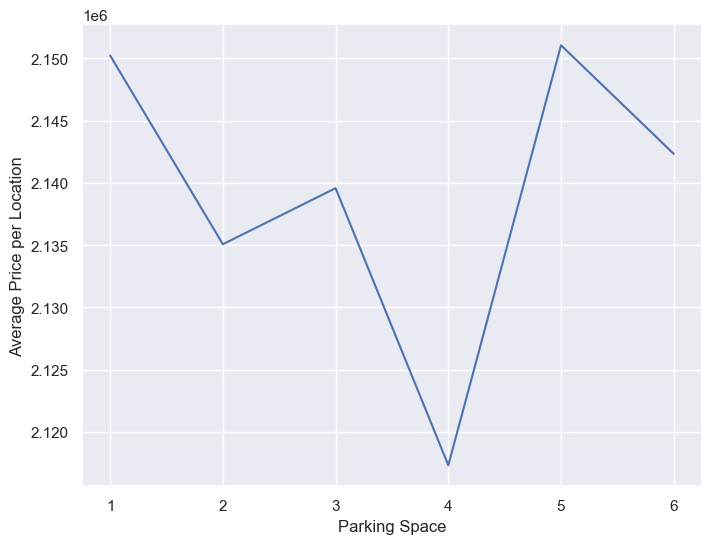

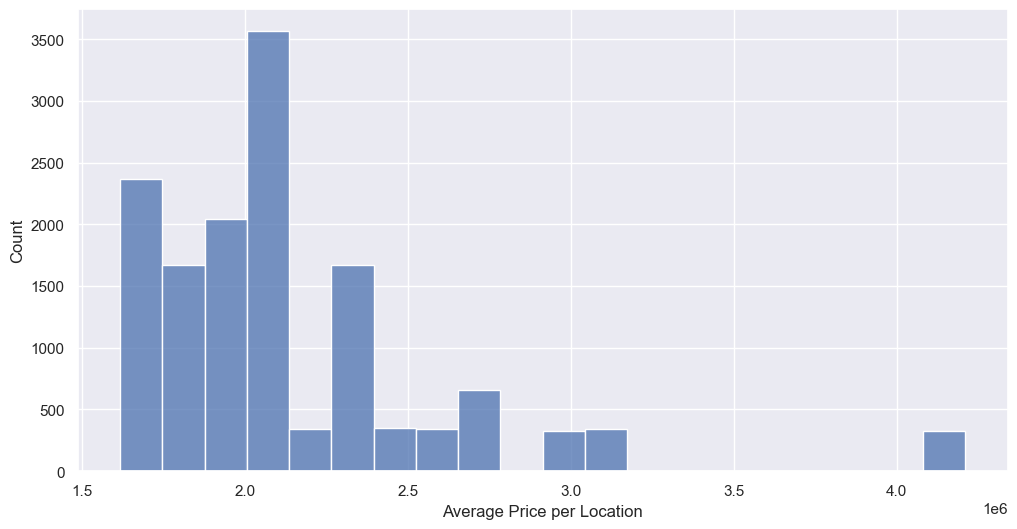

In [92]:

# Summary Statistics
summary_statistics = eda.describe()

# Data Visualization
sns.pairplot(eda[['bedroom', 'bathroom', 'parking_space', 'price', 'avg_price_per_loc']])
plt.show()

# Correlation Analysis
correlation_matrix = eda[['bedroom', 'bathroom', 'parking_space', 'price', 'avg_price_per_loc']].corr()

# Location Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=eda, x='loc')
plt.xticks(rotation=45)
plt.show()

# Price Distribution Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=eda, x='price', bins=20)
plt.show()

# Average Price Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=eda, x='loc', y='avg_price_per_loc')
plt.xticks(rotation=45)
plt.show()

# Price vs. Bedrooms/Bathrooms/Parking Space
plt.figure(figsize=(12, 6))
sns.scatterplot(data=eda, x='bedroom', y='price', hue='parking_space')
plt.show()


# Distribution of Bedrooms and Bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=eda, x='bedroom')
plt.xlabel('Number of Bedrooms')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=eda, x='bathroom')
plt.xlabel('Number of Bathrooms')
plt.show()

# Price Distribution by Location
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='loc', y='price')
plt.xticks(rotation=45)
plt.show()

# Price Distribution by Bedroom and Bathroom
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='bedroom', y='price', hue='bathroom')
plt.show()

# Parking Space vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda, x='parking_space', y='price')
plt.show()

# Price Outliers vs. Location
plt.figure(figsize=(12, 6))
sns.scatterplot(data=eda, x='loc', y='price')
plt.xticks(rotation=45)
plt.show()

# Price Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = eda.pivot_table(values='price', index='loc', columns='bedroom')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.show()

# Pairwise Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda[['bedroom', 'bathroom', 'parking_space', 'price', 'avg_price_per_loc']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Average Price vs. Bedrooms and Bathrooms
plt.figure(figsize=(10, 6))
sns.lineplot(data=eda, x='bedroom', y='avg_price_per_loc', hue='bathroom', ci=None)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Location')
plt.show()

# Average Price vs. Parking Space
plt.figure(figsize=(8, 6))
sns.lineplot(data=eda, x='parking_space', y='avg_price_per_loc', ci=None)
plt.xlabel('Parking Space')
plt.ylabel('Average Price per Location')
plt.show()


# Histogram of Average Price per Location
plt.figure(figsize=(12, 6))
sns.histplot(data=eda, x='avg_price_per_loc', bins=20)
plt.xlabel('Average Price per Location')
plt.ylabel('Count')
plt.show()


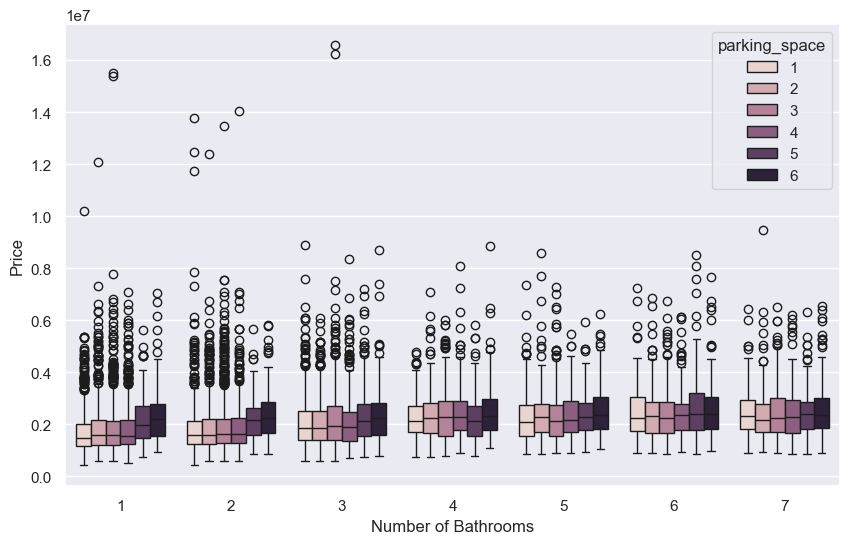

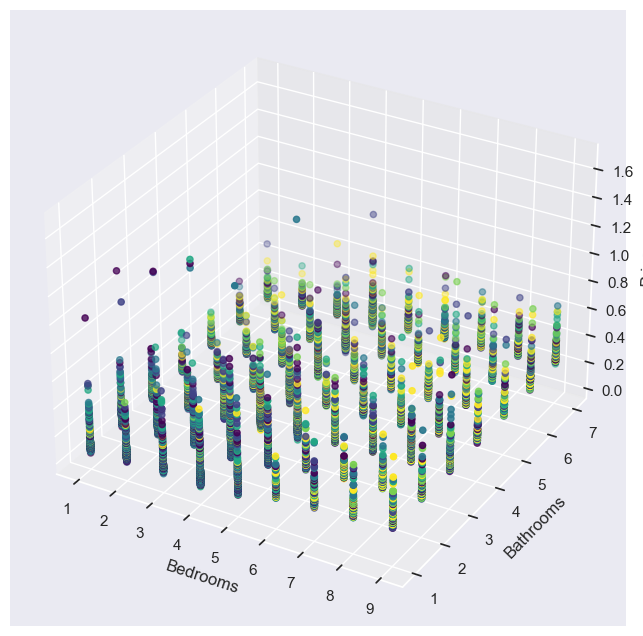

C:\Users\emmanul\AppData\Local\Temp\ipykernel_12416\698299483.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=eda, x='bathroom', y='avg_price_per_loc', hue='parking_space', ci=None)


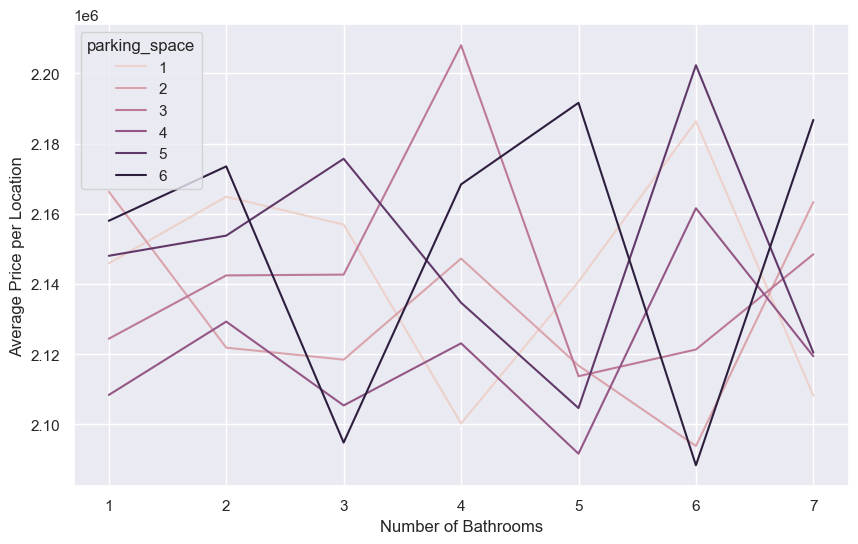

<Figure size 1200x600 with 0 Axes>

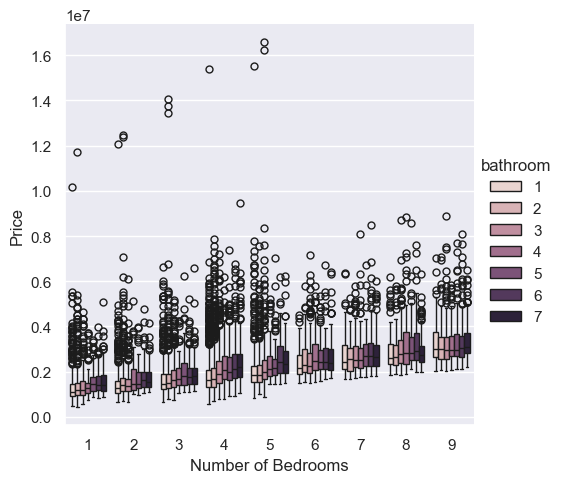

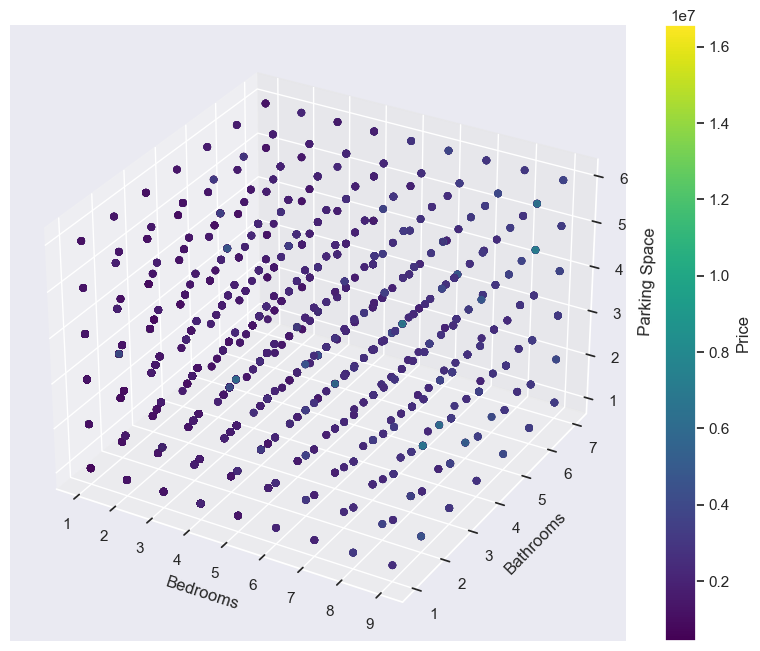

C:\Users\emmanul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


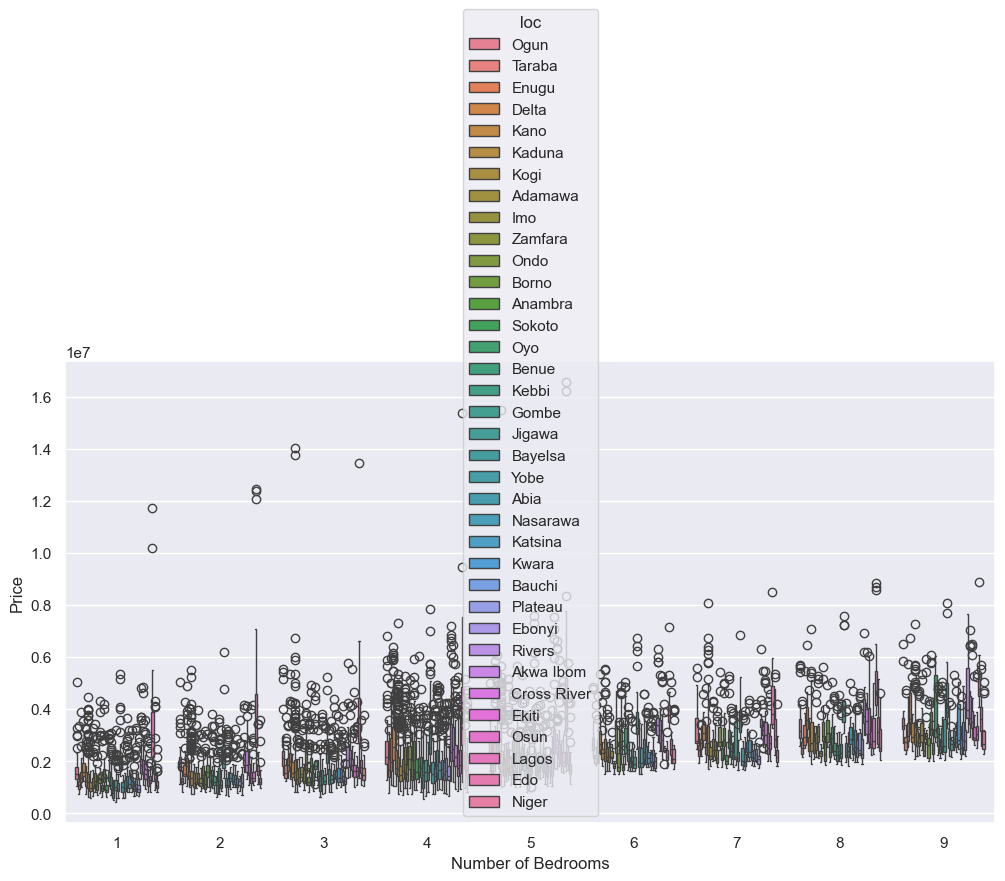

C:\Users\emmanul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


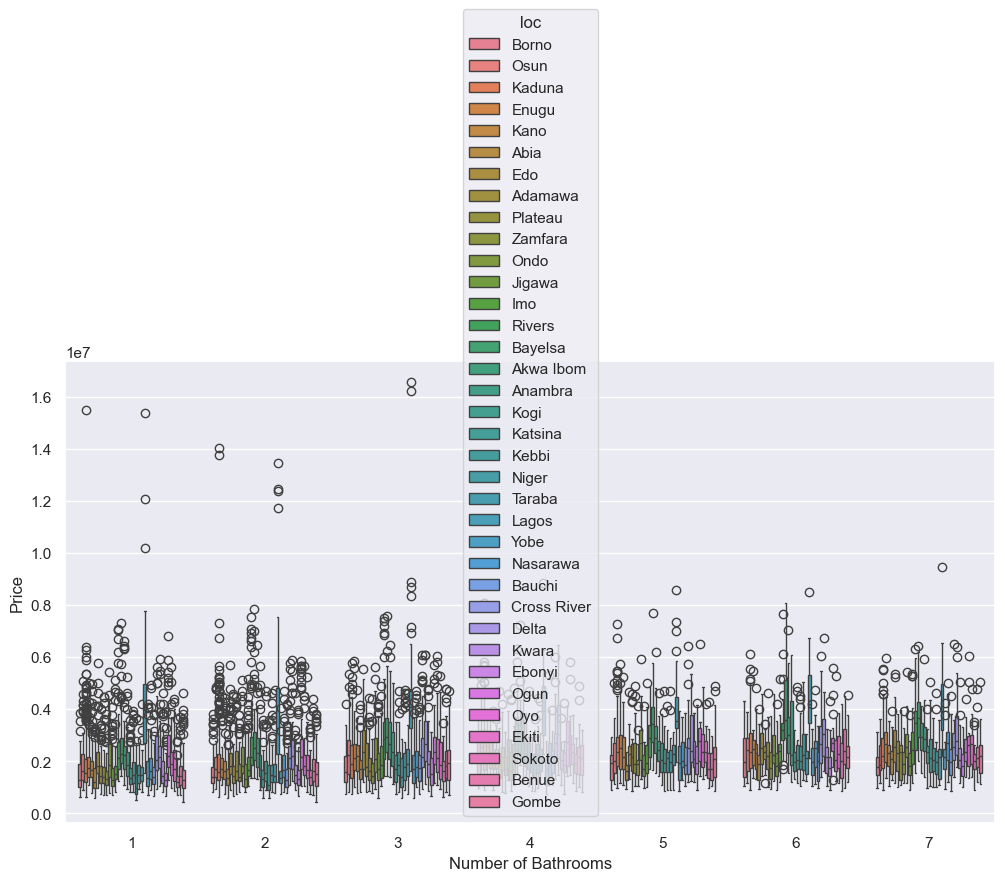

C:\Users\emmanul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

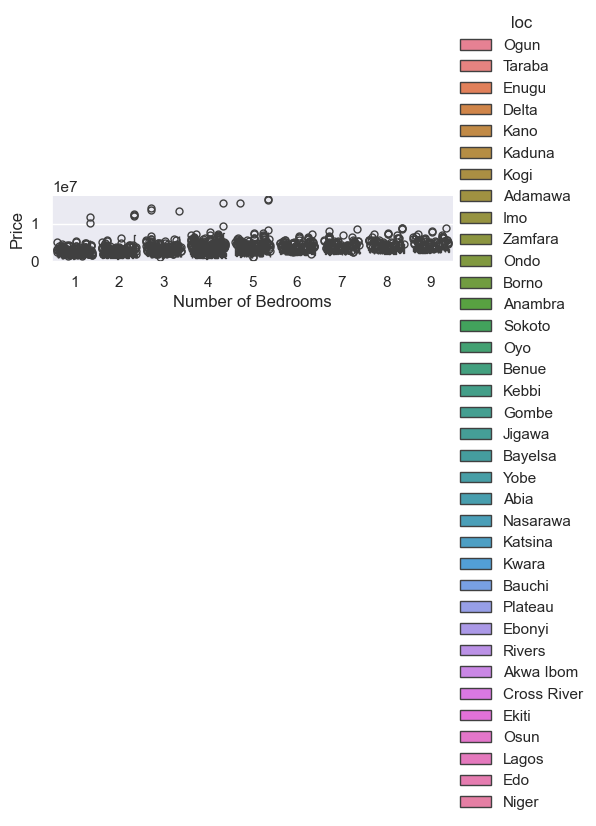

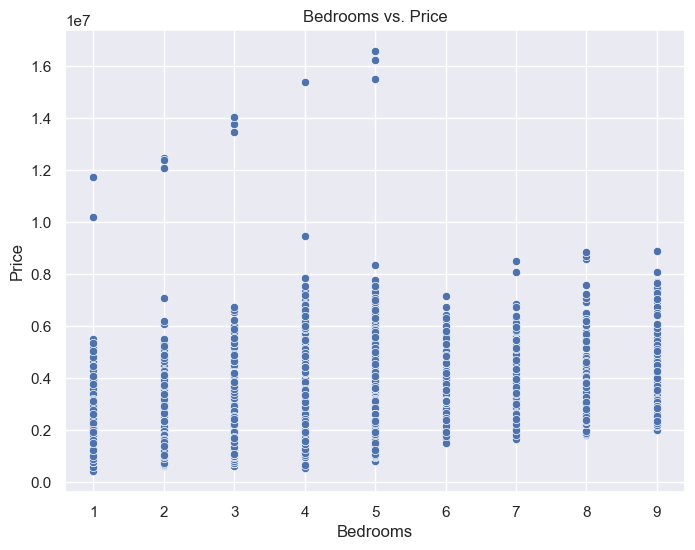

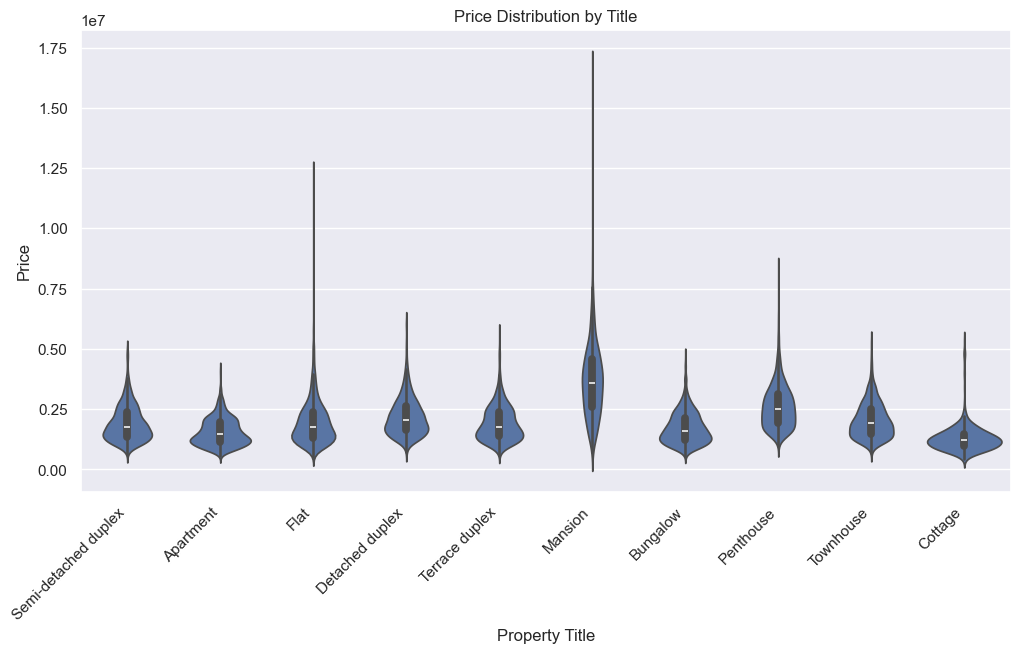

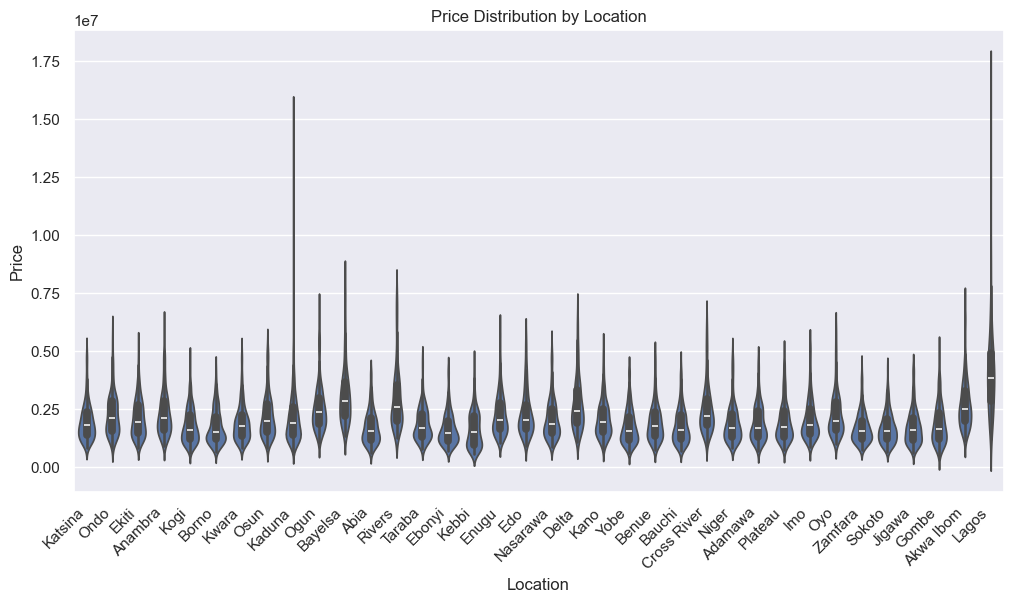

In [94]:
## Price Distribution by Bathrooms and Parking Space:
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda, x='bathroom', y='price', hue='parking_space')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

## Price vs. Bedrooms and Bathrooms (3D Scatter Plot):

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eda['bedroom'], eda['bathroom'], eda['price'], c=df['parking_space'], cmap='viridis')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
plt.show()


## Average Price vs. Bathrooms and Parking Space:
plt.figure(figsize=(10, 6))
sns.lineplot(data=eda, x='bathroom', y='avg_price_per_loc', hue='parking_space', ci=None)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price per Location')
plt.show()

## Price Distribution by Bedrooms and Bathrooms (Categorical Plot):
plt.figure(figsize=(12, 6))
sns.catplot(data=eda, x='bedroom', y='price', hue='bathroom', kind='box')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

## Price vs. Bedrooms, Bathrooms, and Parking Space (3D Scatter Plot with Colorbar):
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(eda['bedroom'], eda['bathroom'], eda['parking_space'], c=eda['price'], cmap='viridis')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Parking Space')
fig.colorbar(sc, label='Price')
plt.show()

## Price Distribution by Bedrooms and Location:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='bedroom', y='price', hue='loc')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

## Price Distribution by Bathrooms and Location:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='bathroom', y='price', hue='loc')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

## Price vs. Bedrooms and Location (Categorical Plot):
plt.figure(figsize=(12, 6))
sns.catplot(data=eda, x='bedroom', y='price', hue='loc', kind='box')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Visualize the relationship between bedrooms and price using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedroom', y='price', data=eda)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs. Price')
plt.show()


# Alternatively, you can use a violin plot for a more detailed view of the distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='title', y='price', data=eda)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Property Title')
plt.ylabel('Price')
plt.title('Price Distribution by Title')



# Alternatively, you can use a violin plot for a more detailed view of the distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='loc', y='price', data=eda)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Price Distribution by Location')
plt.show()
